# Client History EDA


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [38]:
client_df = pd.read_csv('client_data.csv',parse_dates=['date_activ','date_end','date_modif_prod','date_renewal'],dayfirst=True)

In [39]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [40]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [41]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [42]:
client_df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

In [43]:
client_df.isna().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

# Data Visualizations

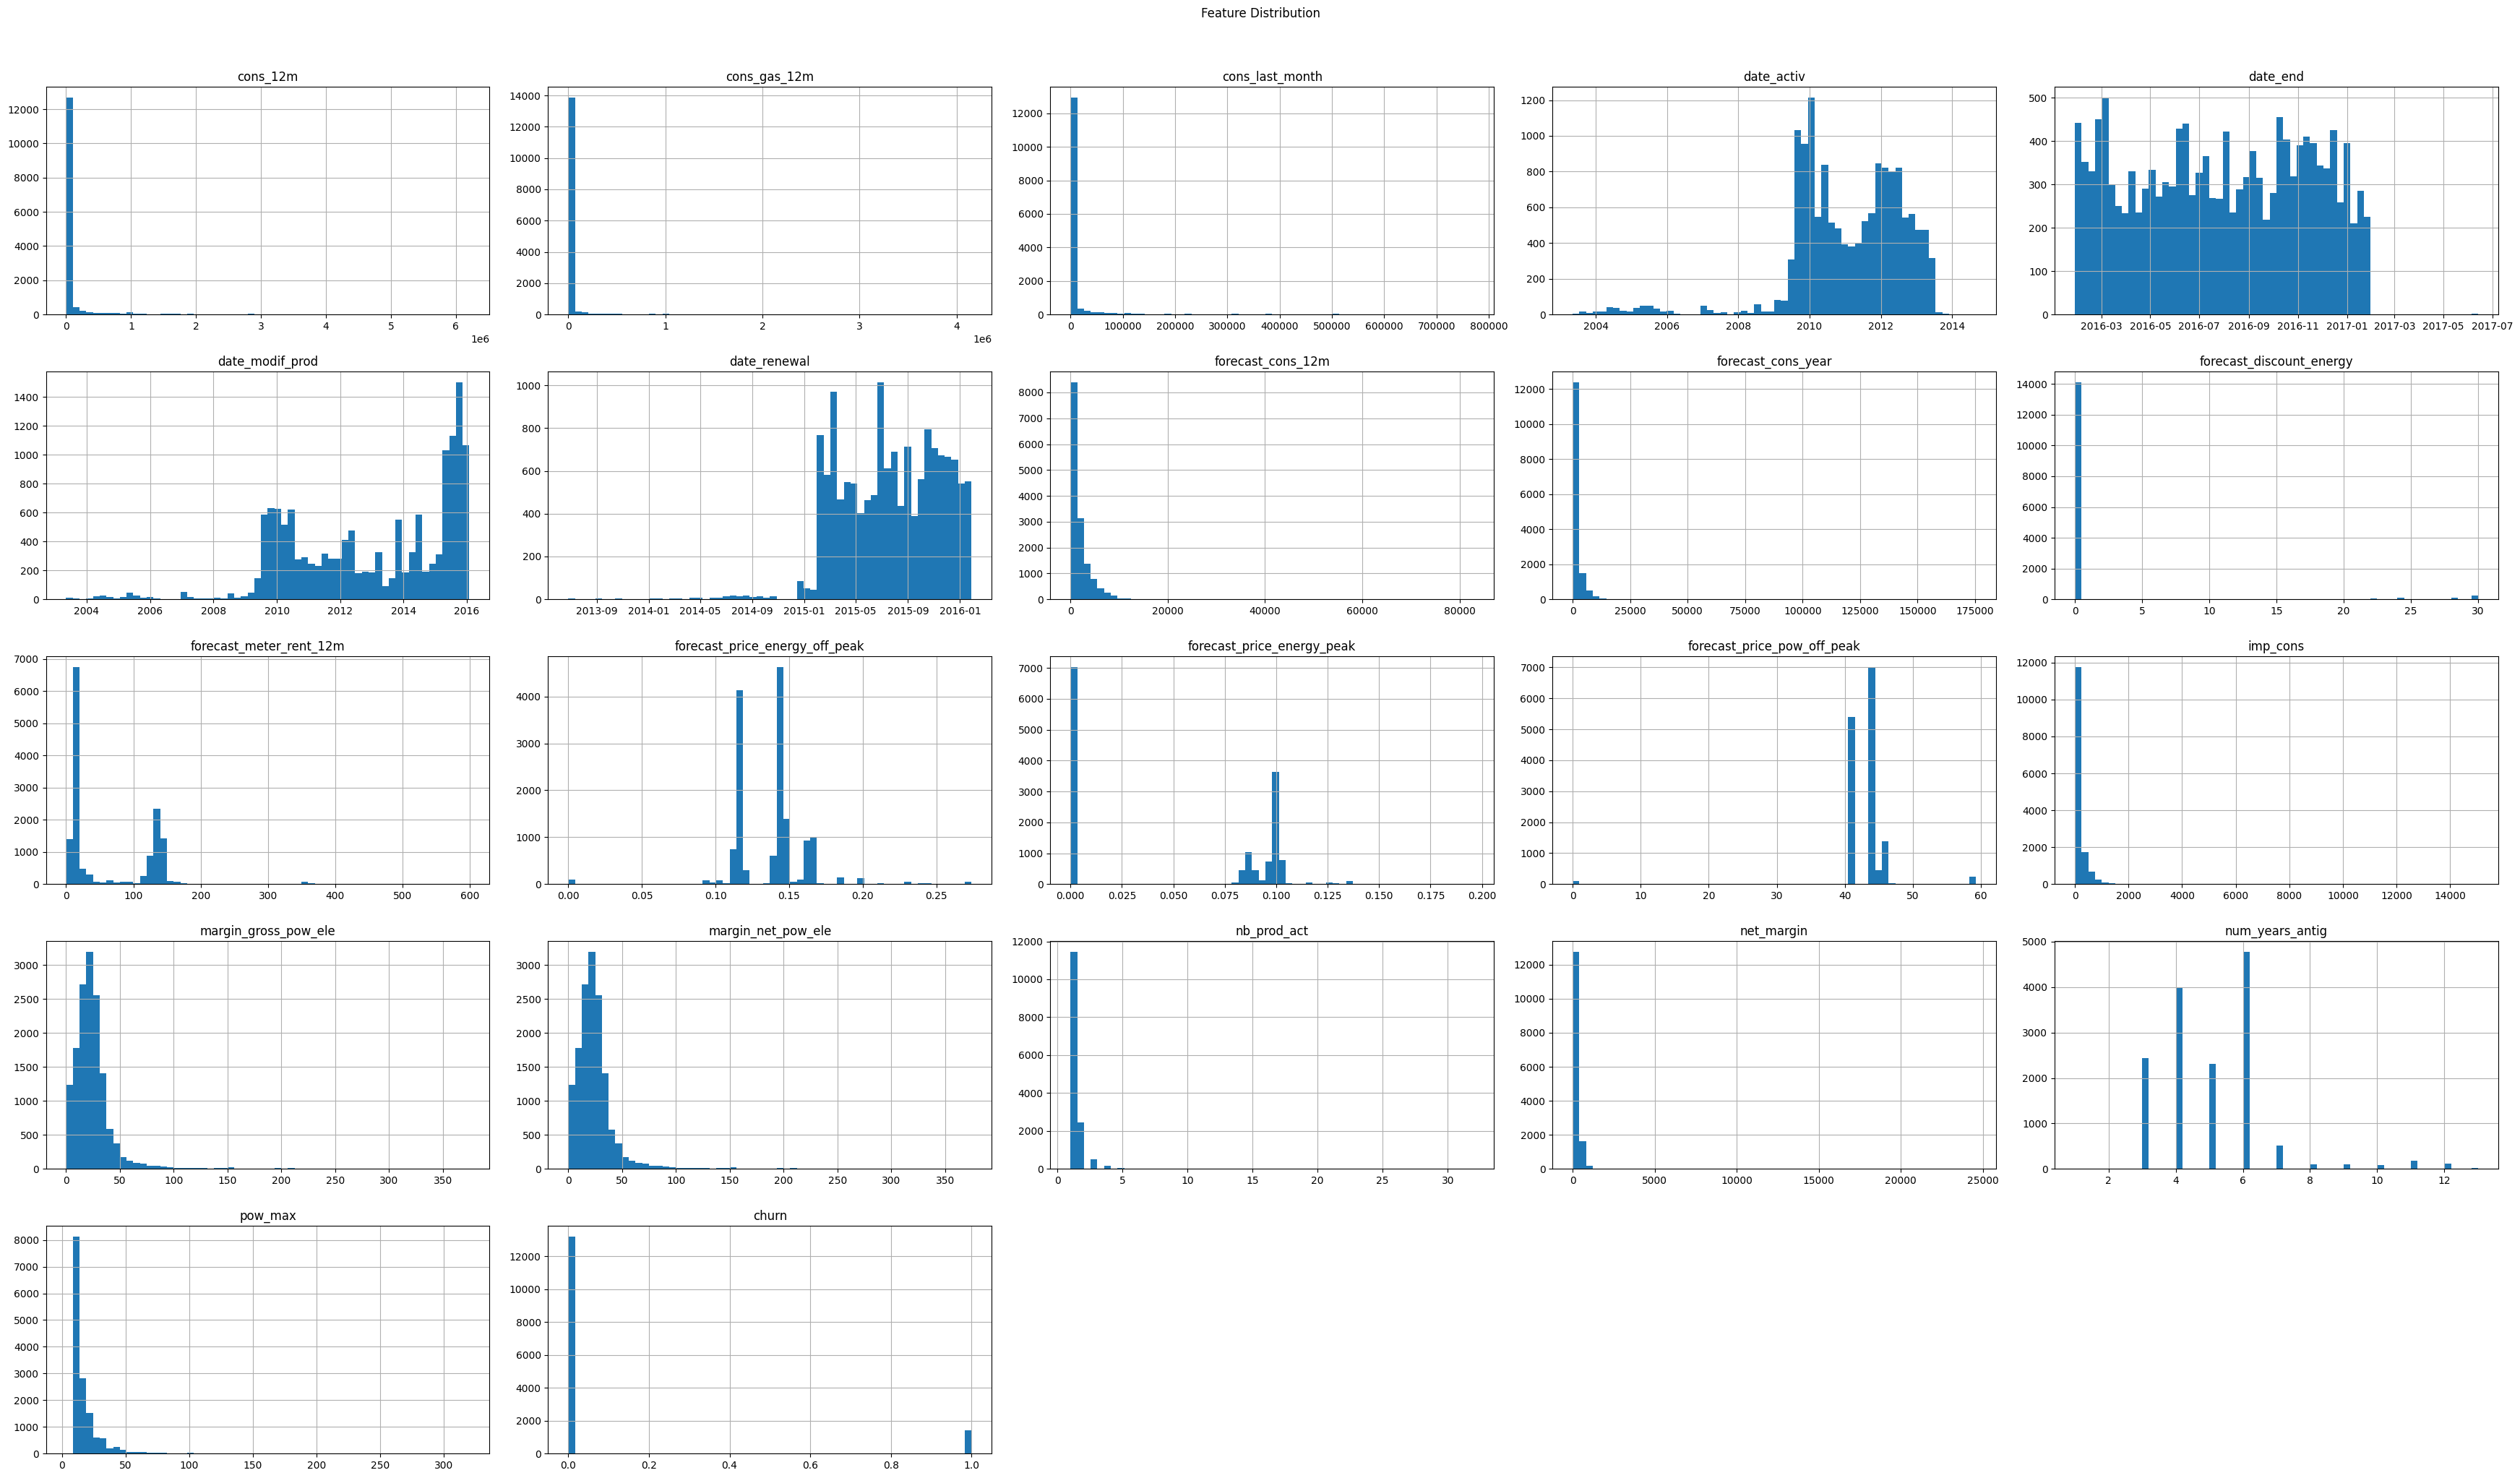

In [44]:
client_df.hist(figsize=(35,20),bins=60)
plt.suptitle('Feature Distribution',x=0.5, y=1.02, ha='center')
plt.tight_layout()

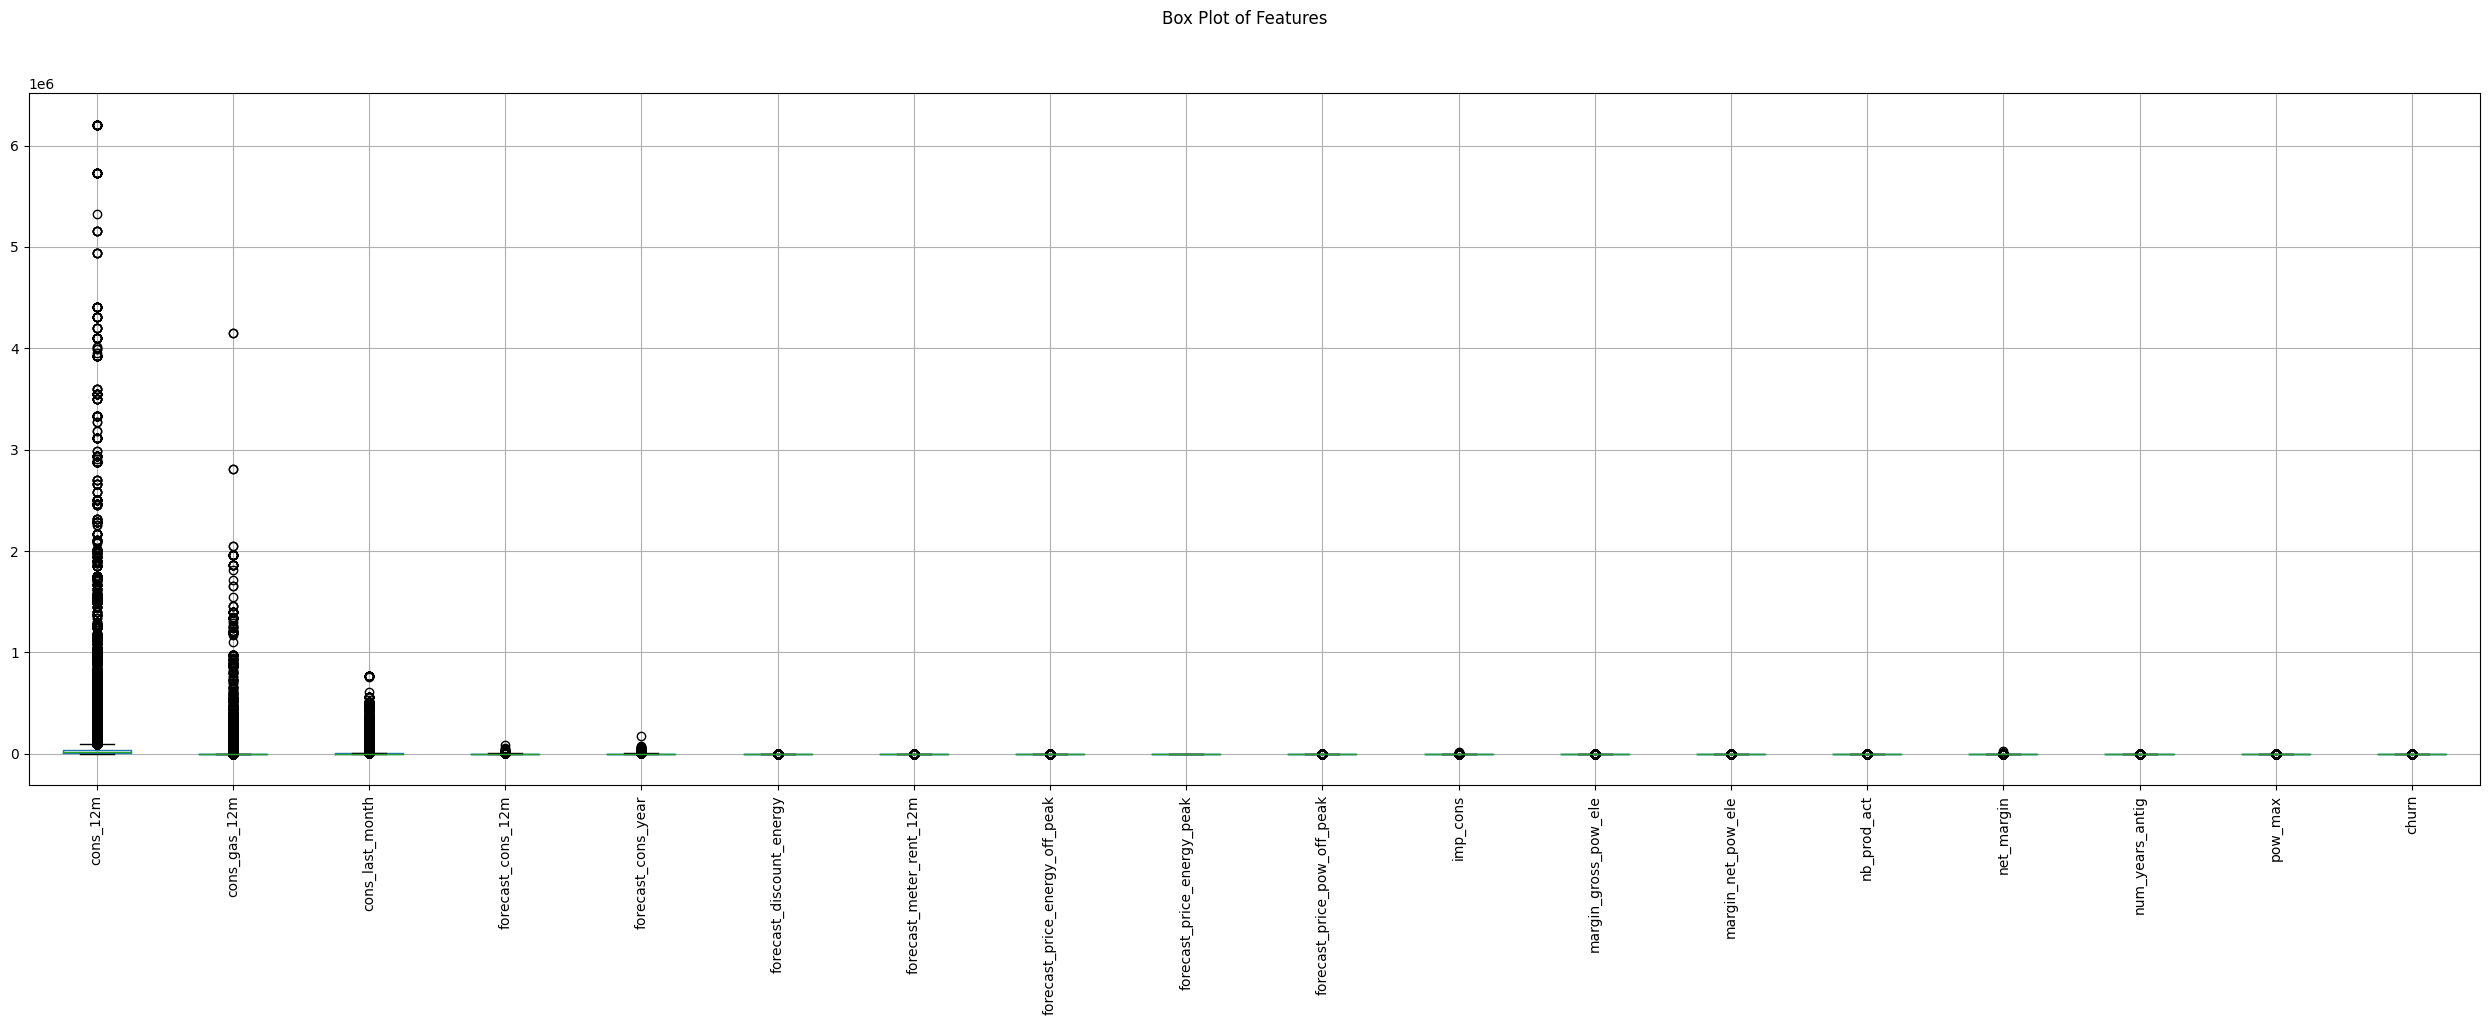

In [45]:
client_df.boxplot(figsize=(25,10))
plt.suptitle('Box Plot of Features',x=0.5,y=1.02,ha='center')
plt.xticks(rotation=90)
plt.tight_layout()

# Remove Unwanted Features/Columns

In [46]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [47]:
client_df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

In [48]:
client_df.drop(['id','channel_sales','cons_12m','cons_gas_12m','date_modif_prod','date_renewal','forecast_cons_12m','forecast_cons_year','forecast_discount_energy',
                'forecast_meter_rent_12m','forecast_price_energy_off_peak','forecast_price_energy_peak','forecast_price_pow_off_peak','imp_cons','origin_up'],
               inplace=True,axis=1)

In [49]:
client_df.head(3)

,cons_last_month,date_activ,date_end,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
0,0,2013-06-15,2016-06-15,t,25.44,25.44,2,678.99,3,43.648,1
1,0,2009-08-21,2016-08-30,f,16.38,16.38,1,18.89,6,13.800,0
2,0,2010-04-16,2016-04-16,f,28.60,28.60,1,6.60,6,13.856,0


In [50]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cons_last_month       14606 non-null  int64         
 1   date_activ            14606 non-null  datetime64[ns]
 2   date_end              14606 non-null  datetime64[ns]
 3   has_gas               14606 non-null  object        
 4   margin_gross_pow_ele  14606 non-null  float64       
 5   margin_net_pow_ele    14606 non-null  float64       
 6   nb_prod_act           14606 non-null  int64         
 7   net_margin            14606 non-null  float64       
 8   num_years_antig       14606 non-null  int64         
 9   pow_max               14606 non-null  float64       
 10  churn                 14606 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(4), object(1)
memory usage: 1.2+ MB


In [51]:
client_df.describe()

,cons_last_month,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,16090.269752,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,64364.196422,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,792.500000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,3383.000000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,771203.000000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [52]:
import datetime
from datetime import datetime, timedelta

In [53]:
client_df['duration'] = (client_df.date_end - client_df.date_activ).dt.days

In [54]:
client_df.head(3)

,cons_last_month,date_activ,date_end,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,duration
0,0,2013-06-15,2016-06-15,t,25.44,25.44,2,678.99,3,43.648,1,1096
1,0,2009-08-21,2016-08-30,f,16.38,16.38,1,18.89,6,13.800,0,2566
2,0,2010-04-16,2016-04-16,f,28.60,28.60,1,6.60,6,13.856,0,2192


In [55]:
client_df.drop(['date_activ','date_end'],inplace=True,axis=1)

In [56]:
client_df.head(3)

,cons_last_month,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,duration
0,0,t,25.44,25.44,2,678.99,3,43.648,1,1096
1,0,f,16.38,16.38,1,18.89,6,13.800,0,2566
2,0,f,28.60,28.60,1,6.60,6,13.856,0,2192


# Data Visualization 2

<Axes: title={'center': 'Churn'}, xlabel='churn', ylabel='count'>

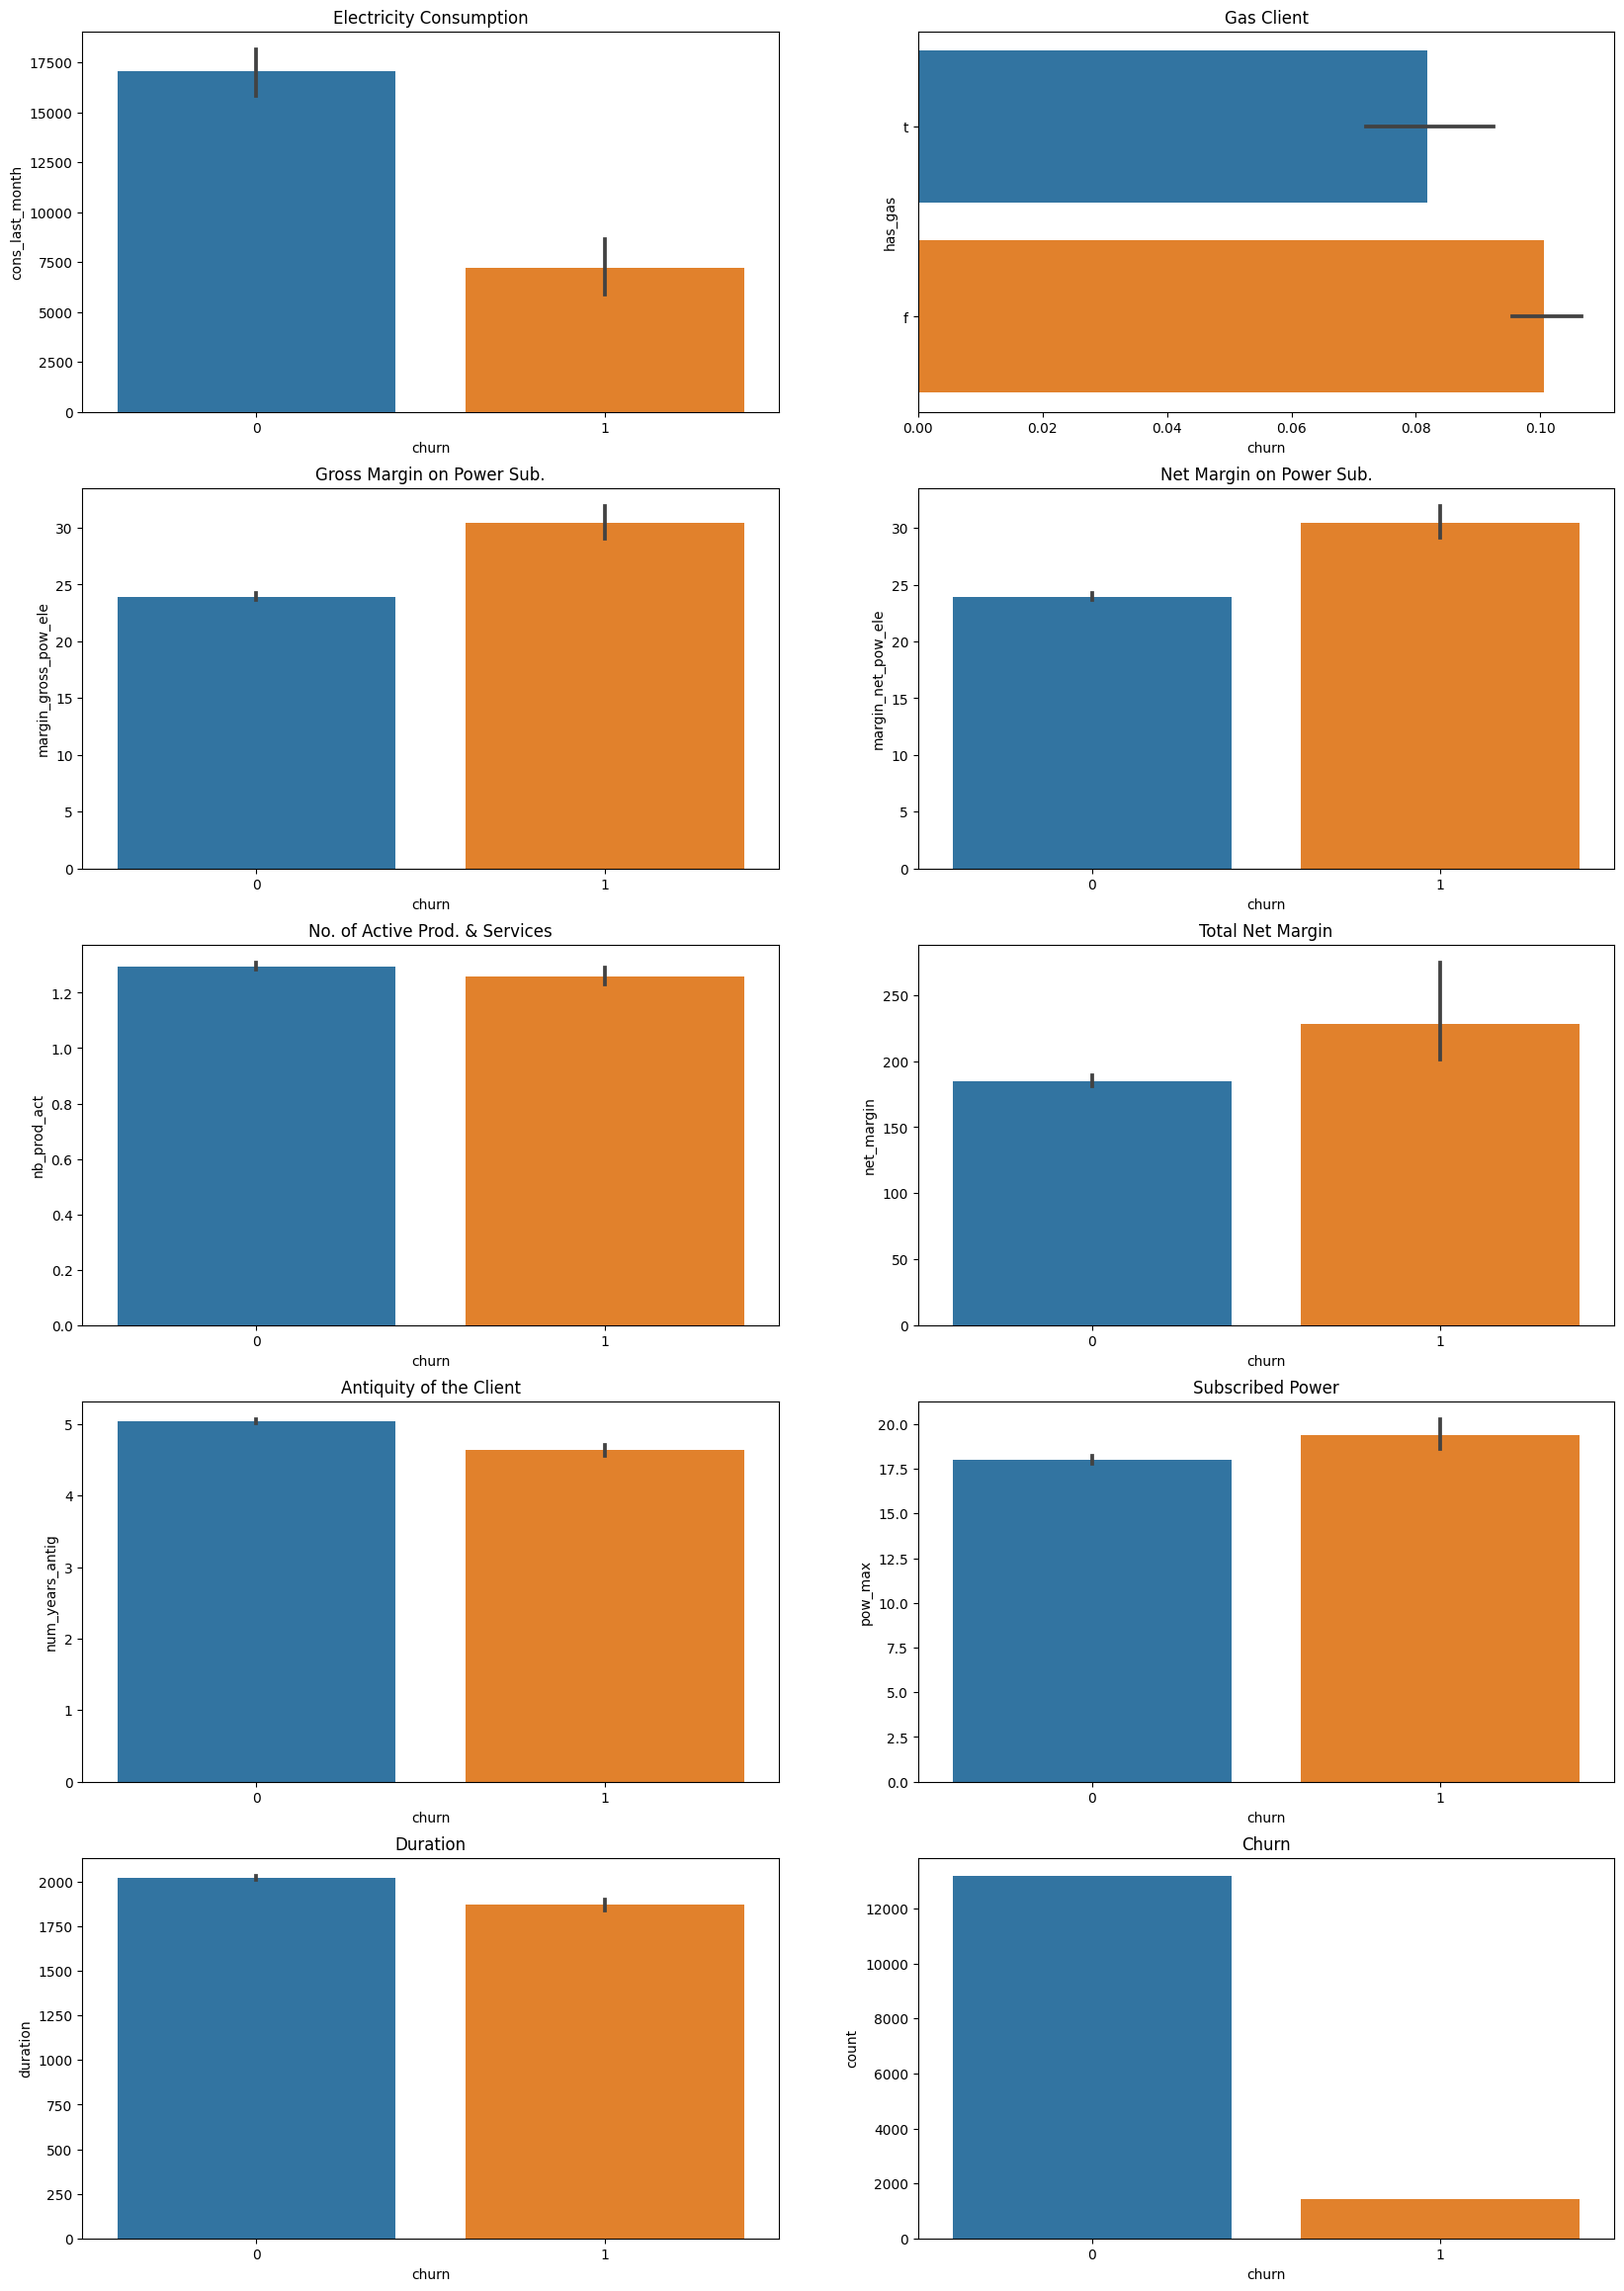

In [57]:
plt.figure(figsize=(20,35))

plt.subplot(6,2,1)
plt.title('Electricity Consumption')
sns.barplot(x='churn',y='cons_last_month',data=client_df)

plt.subplot(6,2,2)
plt.title('Gas Client')
sns.barplot(x='churn',y='has_gas',data=client_df)

plt.subplot(6,2,3)
plt.title('Gross Margin on Power Sub.')
sns.barplot(x='churn',y='margin_gross_pow_ele',data=client_df)

plt.subplot(6,2,4)
plt.title('Net Margin on Power Sub.')
sns.barplot(x='churn',y='margin_net_pow_ele',data=client_df)

plt.subplot(6,2,5)
plt.title('No. of Active Prod. & Services')
sns.barplot(x='churn',y='nb_prod_act',data=client_df)

plt.subplot(6,2,6)
plt.title('Total Net Margin')
sns.barplot(x='churn',y='net_margin',data=client_df)

plt.subplot(6,2,7)
plt.title('Antiquity of the Client')
sns.barplot(x='churn',y='num_years_antig',data=client_df)

plt.subplot(6,2,8)
plt.title('Subscribed Power')
sns.barplot(x='churn',y='pow_max',data=client_df)

plt.subplot(6,2,9)
plt.title('Duration')
sns.barplot(x='churn',y='duration',data=client_df)

plt.subplot(6,2,10)
plt.title('Churn')
sns.countplot(x='churn',data=client_df)

<Figure size 3500x2000 with 0 Axes>

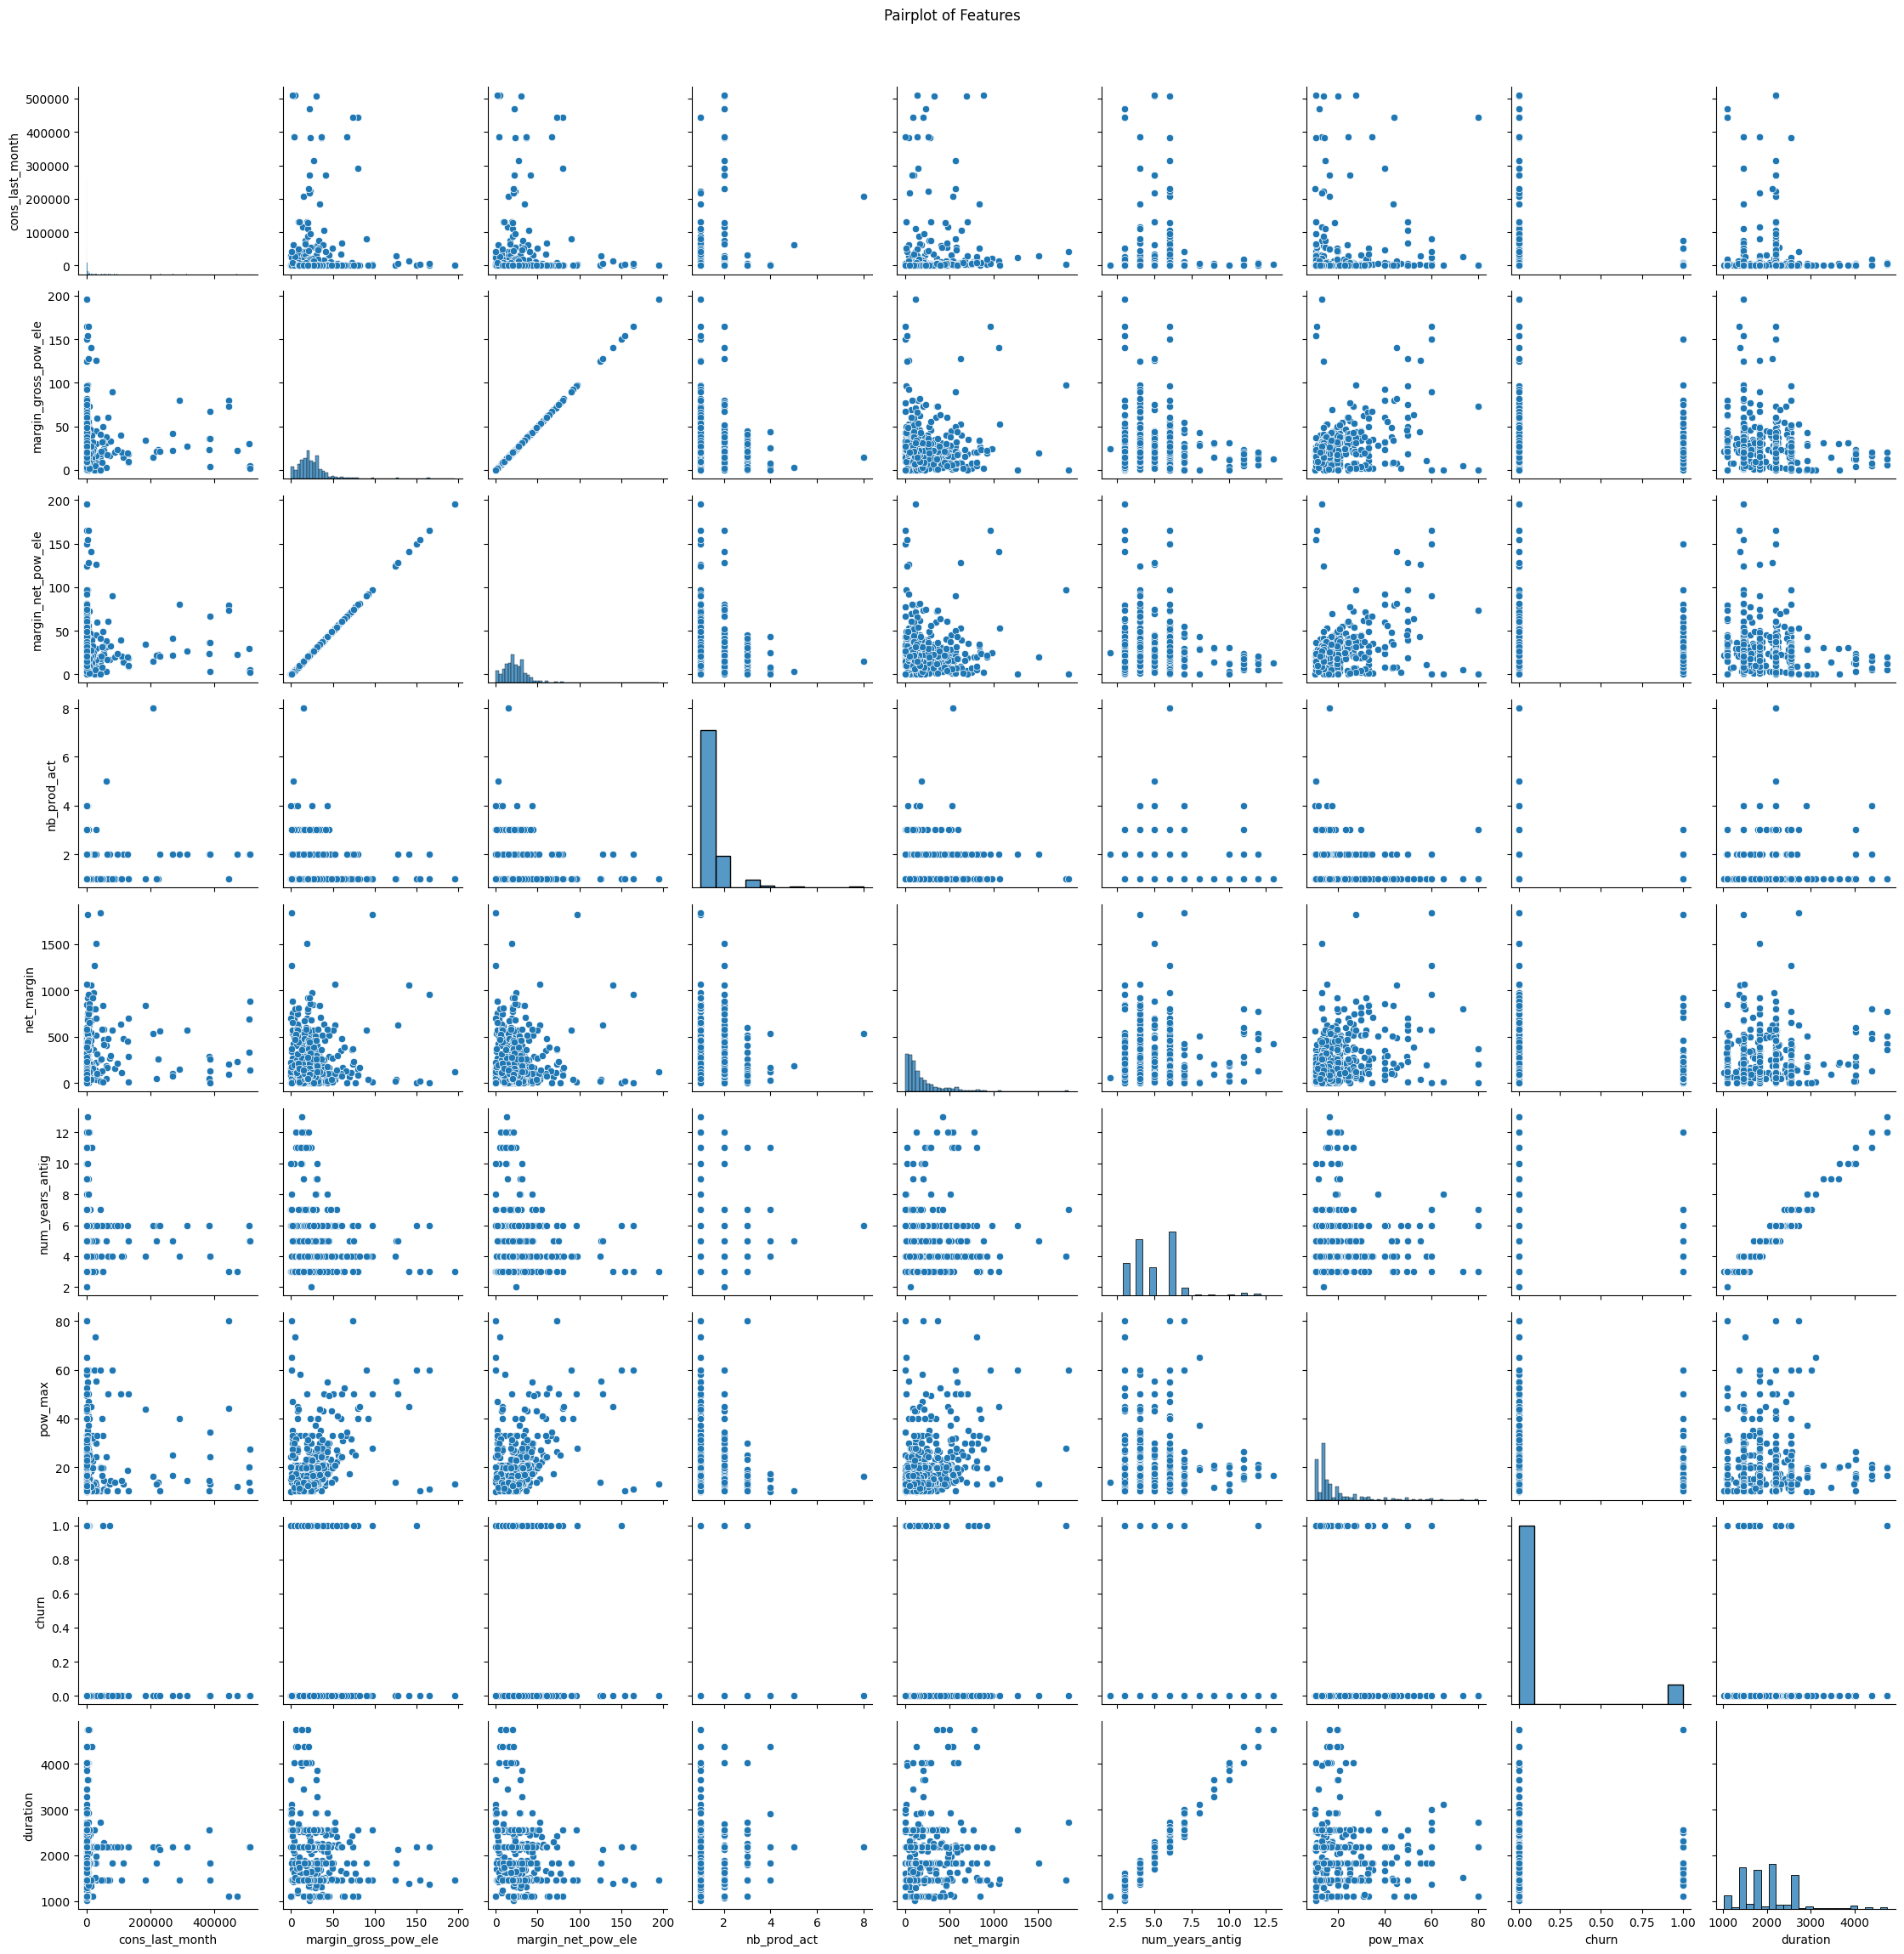

In [58]:
plt.figure(figsize=(35,20))
sns.pairplot(client_df.sample(700))
plt.suptitle('Pairplot of Features', x=0.5, y=1.02, ha='center')
plt.tight_layout()

In [59]:
client_df.corr()

,cons_last_month,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,duration
cons_last_month,1.000000,-0.011498,-0.011477,0.169099,0.121835,-0.003677,0.074529,-0.045284,-0.022239
margin_gross_pow_ele,-0.011498,1.000000,0.999914,-0.006784,0.031814,-0.061091,0.373298,0.095725,-0.127738
margin_net_pow_ele,-0.011477,0.999914,1.000000,-0.006763,0.031639,-0.061197,0.373351,0.095772,-0.127820
nb_prod_act,0.169099,-0.006784,-0.006763,1.000000,0.053781,0.005228,0.012712,-0.014930,0.003266
net_margin,0.121835,0.031814,0.031639,0.053781,1.000000,-0.000263,0.325417,0.041135,-0.012310
num_years_antig,-0.003677,-0.061091,-0.061197,0.005228,-0.000263,1.000000,0.059715,-0.074140,0.956437
pow_max,0.074529,0.373298,0.373351,0.012712,0.325417,0.059715,1.000000,0.030362,0.047179
churn,-0.045284,0.095725,0.095772,-0.014930,0.041135,-0.074140,0.030362,1.000000,-0.073919
duration,-0.022239,-0.127738,-0.127820,0.003266,-0.012310,0.956437,0.047179,-0.073919,1.000000


<Axes: >

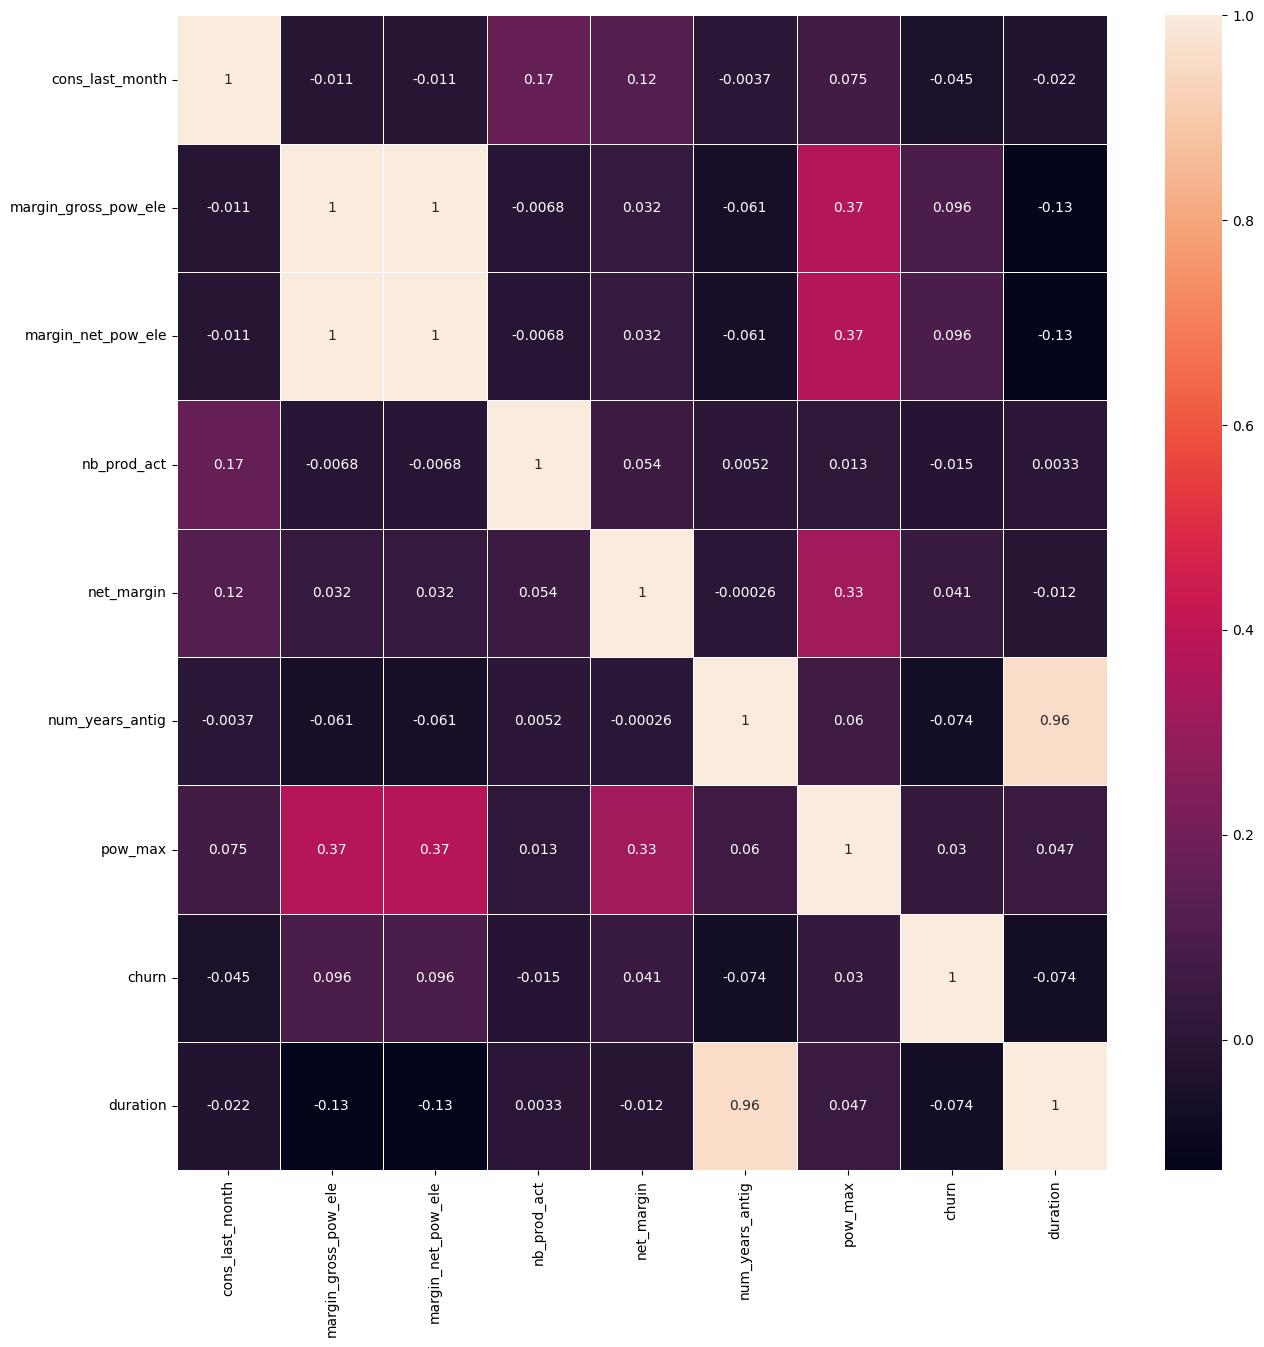

In [60]:
plt.figure(figsize=(15,15))
sns.heatmap(client_df.corr(),annot=True,linewidths=0.5,linecolor='white')

# Hypothesis Testing

Levene's Test

In [61]:
import scipy

In [62]:
scipy.stats.levene(client_df.pow_max,client_df.churn,center='mean')

LeveneResult(statistic=6077.213476037721, pvalue=0.0)

T-Test

In [63]:
scipy.stats.ttest_ind(client_df.pow_max,client_df.churn,equal_var=True)

Ttest_indResult(statistic=161.02735495598836, pvalue=0.0)

Chi Square

In [64]:
cont_table = pd.crosstab(client_df.nb_prod_act,client_df.churn)
cont_table

churn,0,1
nb_prod_act,,
1,10290,1141
2,2237,208
3,471,52
4,135,15
5,28,3
6,8,0
8,4,0
9,11,0
10,2,0


In [65]:
scipy.stats.chi2_contingency(cont_table,correction=True)

Chi2ContingencyResult(statistic=7.835580246407849, pvalue=0.5507970804381235, dof=9, expected_freq=array([[1.03204571e+04, 1.11054286e+03],
       [2.20746371e+03, 2.37536286e+02],
       [4.72189580e+02, 5.08104204e+01],
       [1.35427222e+02, 1.45727783e+01],
       [2.79882925e+01, 3.01170752e+00],
       [7.22278516e+00, 7.77214843e-01],
       [3.61139258e+00, 3.88607422e-01],
       [9.93132959e+00, 1.06867041e+00],
       [1.80569629e+00, 1.94303711e-01],
       [9.02848145e-01, 9.71518554e-02]]))

# Data Preprocessing

In [66]:
client_df.isna().sum()

cons_last_month         0
has_gas                 0
margin_gross_pow_ele    0
margin_net_pow_ele      0
nb_prod_act             0
net_margin              0
num_years_antig         0
pow_max                 0
churn                   0
duration                0
dtype: int64

In [67]:
client_df.duplicated(keep='first').sum()

3

In [68]:
client_df.drop_duplicates(ignore_index=True,inplace=True)

In [69]:
client_df.duplicated(keep='first').sum()

0

One-Hot Encoding

In [70]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14603 entries, 0 to 14602
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cons_last_month       14603 non-null  int64  
 1   has_gas               14603 non-null  object 
 2   margin_gross_pow_ele  14603 non-null  float64
 3   margin_net_pow_ele    14603 non-null  float64
 4   nb_prod_act           14603 non-null  int64  
 5   net_margin            14603 non-null  float64
 6   num_years_antig       14603 non-null  int64  
 7   pow_max               14603 non-null  float64
 8   churn                 14603 non-null  int64  
 9   duration              14603 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.1+ MB


In [71]:
client_df['has_gas'] = pd.get_dummies(data=client_df['has_gas'],drop_first=True)

In [72]:
client_df.head()

,cons_last_month,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,duration
0,0,1,25.44,25.44,2,678.99,3,43.648,1,1096
1,0,0,16.38,16.38,1,18.89,6,13.800,0,2566
2,0,0,28.60,28.60,1,6.60,6,13.856,0,2192
3,0,0,30.22,30.22,1,25.46,6,13.200,0,2192
4,526,0,44.91,44.91,1,47.98,6,19.800,0,2245


ANOVA

In [73]:
f_statistic, p_value = scipy.stats.f_oneway(client_df.has_gas,client_df.churn)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 439.8097533205506, P-Value: 6.181459330306195e-97


# Price History EDA


In [3]:
df = pd.read_csv('price_data.csv',parse_dates=['price_date'],dayfirst=True)

In [4]:
df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


In [6]:
df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


# Exploratory Data Analysis

In [7]:
df.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

In [8]:
df['id'].value_counts()

038af19179925da21a25619c5a24b745    12
97589d95ec46ab31ef238d18a616403f    12
97adbcd721fae4874f7ee287ea84200d    12
d74b4544363be674855cf931b6b8af25    12
27276020e48d73f589788d4e37c51879    12
                                    ..
83cf18b07114e495ae8b7fb235e45ee2     8
3e459d61dc831e29f8a9a9a59f95efd2     8
c5dcd5c506e565aaabffa29bc1ec0a37     7
bf89f2d8c1b133a134fd93603cb4c947     7
15b36e47cf04bf151e3f4438d12672e5     7
Name: id, Length: 16096, dtype: int64

In [9]:
df['price_date'].value_counts()

2015-08-01    16094
2015-12-01    16094
2015-07-01    16090
2015-11-01    16087
2015-06-01    16085
2015-10-01    16085
2015-02-01    16082
2015-09-01    16082
2015-05-01    16080
2015-04-01    16079
2015-03-01    16074
2015-01-01    16070
Name: price_date, dtype: int64

In [10]:
df.groupby('price_date').mean()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
price_date,,,,,,
2015-01-01,0.142568,0.054950,0.030333,43.226643,10.692921,6.455861
2015-02-01,0.142767,0.055053,0.030367,43.238161,10.673719,6.449016
2015-03-01,0.143104,0.055118,0.030396,43.254033,10.644489,6.430121
2015-04-01,0.143259,0.056035,0.030492,43.288439,10.647277,6.423156
2015-05-01,0.143534,0.055359,0.030393,43.315388,10.602453,6.390806
2015-06-01,0.143731,0.055255,0.029902,43.347320,10.415769,6.281304
2015-07-01,0.143683,0.055369,0.030636,43.345012,10.642236,6.421464
2015-08-01,0.137933,0.053605,0.030717,43.365366,10.661678,6.431518
2015-09-01,0.137933,0.053532,0.030606,43.351874,10.602979,6.391788


In [11]:
df.groupby('price_date').median()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
price_date,,,,,,
2015-01-01,0.148825,0.085058,0.0,44.266931,0.0,0.0
2015-02-01,0.148825,0.085058,0.0,44.266931,0.0,0.0
2015-03-01,0.148825,0.085390,0.0,44.266931,0.0,0.0
2015-04-01,0.148825,0.085483,0.0,44.266930,0.0,0.0
2015-05-01,0.148825,0.085483,0.0,44.266930,0.0,0.0
2015-06-01,0.148825,0.085483,0.0,44.266930,0.0,0.0
2015-07-01,0.148825,0.085570,0.0,44.266930,0.0,0.0
2015-08-01,0.144524,0.085483,0.0,44.266930,0.0,0.0
2015-09-01,0.144698,0.085483,0.0,44.266930,0.0,0.0


In [12]:
df.groupby('id').mean()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
id,,,,,,
0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...
ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972
fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000
fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569


In [13]:
df.groupby('id').median()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
id,,,,,,
0002203ffbb812588b632b9e628cc38d,0.126098,0.103975,0.073719,40.728885,24.437330,16.291555
0004351ebdd665e6ee664792efc4fd13,0.148047,0.000000,0.000000,44.444710,0.000000,0.000000
0010bcc39e42b3c2131ed2ce55246e3c,0.201280,0.000000,0.000000,45.944710,0.000000,0.000000
0010ee3855fdea87602a5b7aba8e42de,0.122157,0.100029,0.069027,40.647429,24.388455,16.258972
00114d74e963e47177db89bc70108537,0.149434,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...
ffef185810e44254c3a4c6395e6b4d8a,0.141684,0.116282,0.080223,40.896427,24.637456,16.507972
fffac626da707b1b5ab11e8431a4d0a2,0.148825,0.000000,0.000000,44.266931,0.000000,0.000000
fffc0cacd305dd51f316424bbb08d1bd,0.153159,0.130578,0.091448,41.228885,24.937330,16.791555


In [14]:
company_price_df = pd.DataFrame(df.groupby('id').mean())

In [15]:
company_price_df.head()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
id,,,,,,
0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000


In [17]:
output_df = pd.read_csv('output.csv',index_col='id')

In [18]:
output_df.head()

,churn
id,
24011ae4ebbe3035111d65fa7c15bc57,1
d29c2c54acc38ff3c0614d0a653813dd,0
764c75f661154dac3a6c254cd082ea7d,0
bba03439a292a1e166f80264c16191cb,0
149d57cf92fc41cf94415803a877cb4b,0


In [19]:
final_price_df = pd.merge(left=company_price_df,right=output_df,how='inner',left_index=True,right_index=True)

In [20]:
final_price_df.head()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn
id,,,,,,,
0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,0
0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,0
0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,0
00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,0
0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,0


In [21]:
final_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14606 entries, 0002203ffbb812588b632b9e628cc38d to ffff7fa066f1fb305ae285bb03bf325a
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price_off_peak_var  14606 non-null  float64
 1   price_peak_var      14606 non-null  float64
 2   price_mid_peak_var  14606 non-null  float64
 3   price_off_peak_fix  14606 non-null  float64
 4   price_peak_fix      14606 non-null  float64
 5   price_mid_peak_fix  14606 non-null  float64
 6   churn               14606 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 1.4+ MB


In [22]:
final_price_df['churn'].value_counts()

0    13187
1     1419
Name: churn, dtype: int64

In [23]:
print('Percentage of customer churn: {:.2f}%'.format(1419/13187*100))

Percentage of customer churn: 10.76%


In [24]:
final_price_df.reset_index(inplace=True)

In [25]:
final_price_df.head(2)

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.07316,40.701732,24.421038,16.280694,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.00000,44.385450,0.000000,0.000000,0


# Data Visualization

Text(0.5, 1.02, 'PairPlot of the Data')

<Figure size 3000x1500 with 0 Axes>

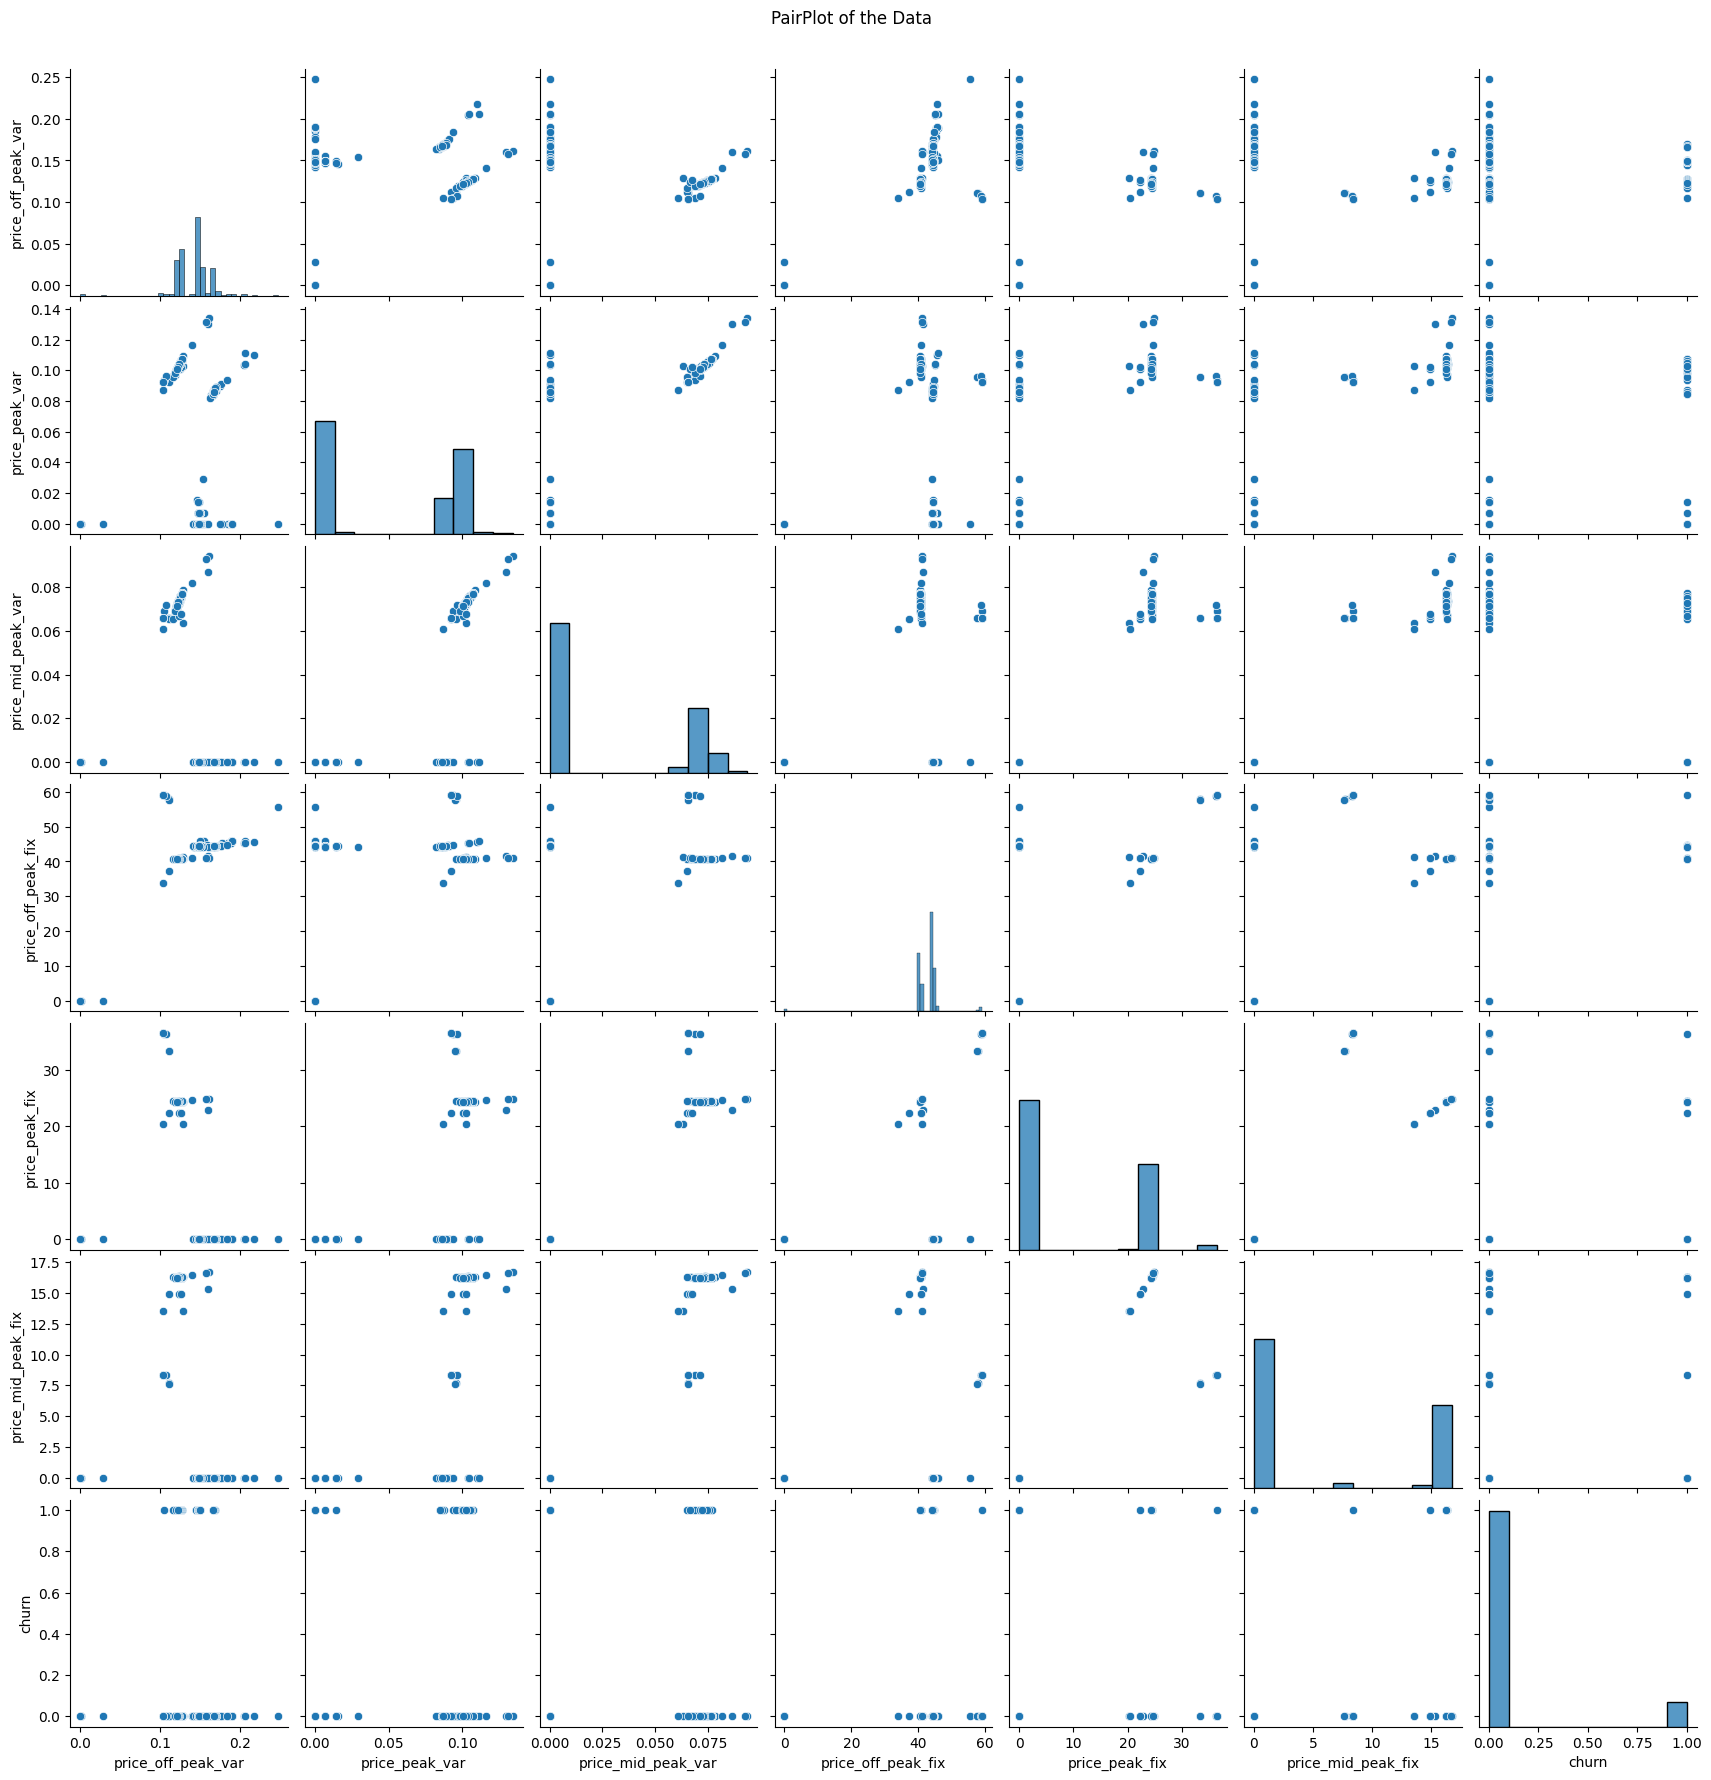

In [26]:
plt.figure(figsize=(30,15))
sns.pairplot(final_price_df.sample(500))
plt.suptitle('PairPlot of the Data',x=0.5,y=1.02,fontsize='large',ha='center')

Text(0.5, 1.02, 'Feature Distribution')

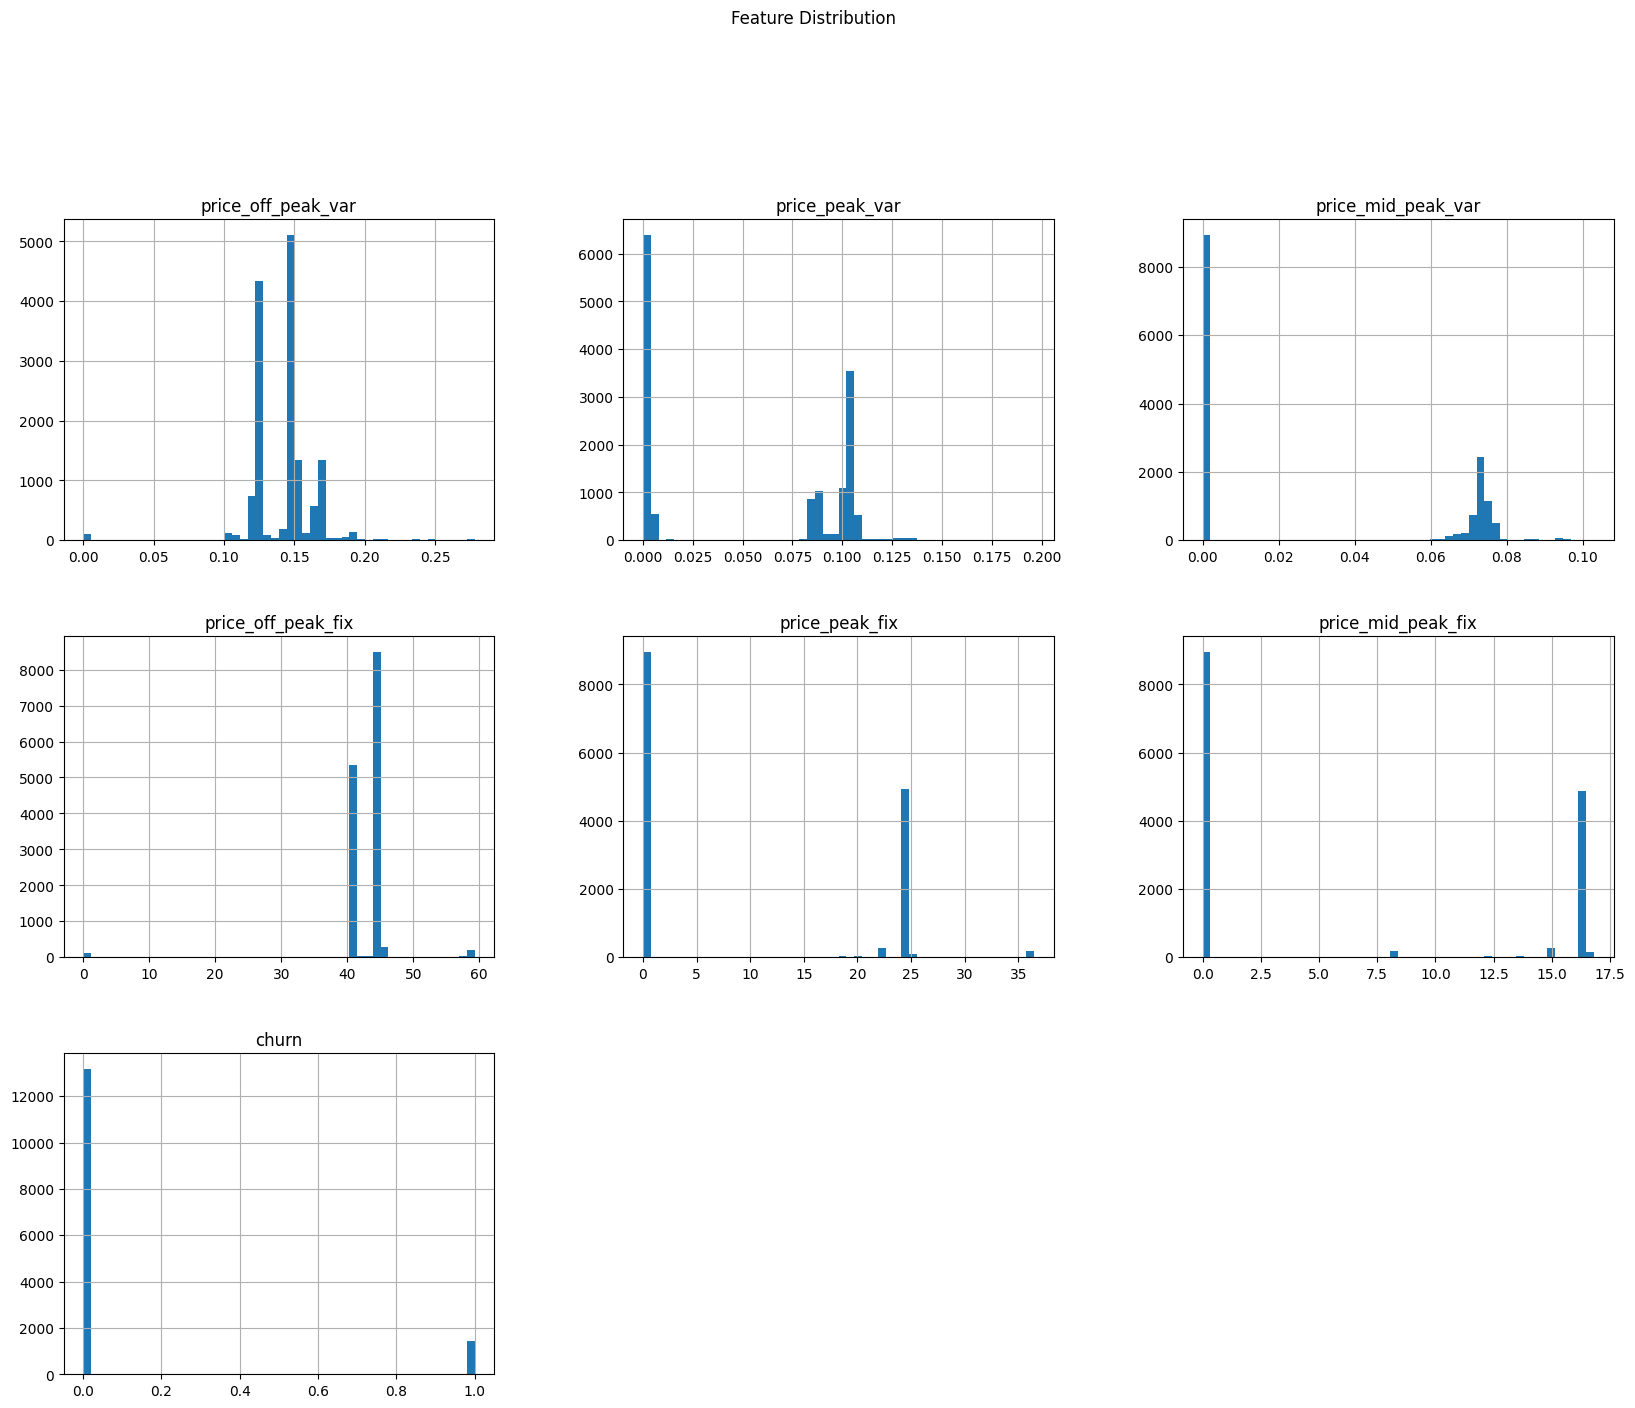

In [27]:
final_price_df.hist(bins=50,figsize=(20,15))
plt.suptitle('Feature Distribution',x=0.5,y=1.02,ha='center',fontsize='large')

Text(0.5, 1.02, 'BoxPlot')

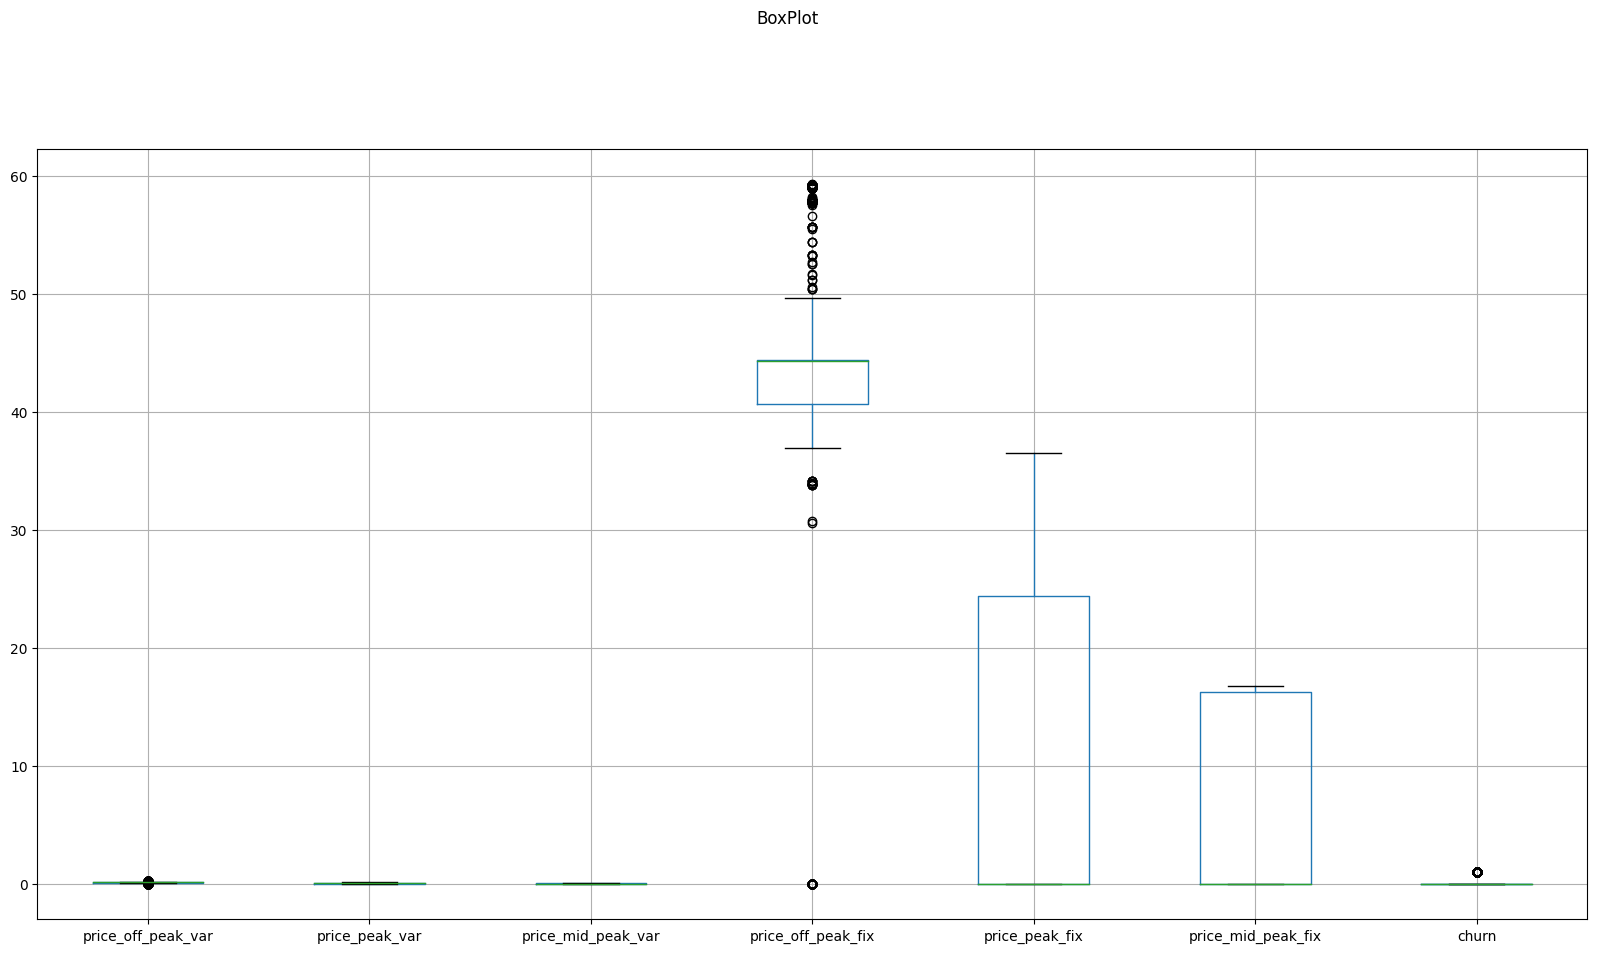

In [28]:
final_price_df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlot',x=0.5,y=1.02,ha='center',fontsize='large')

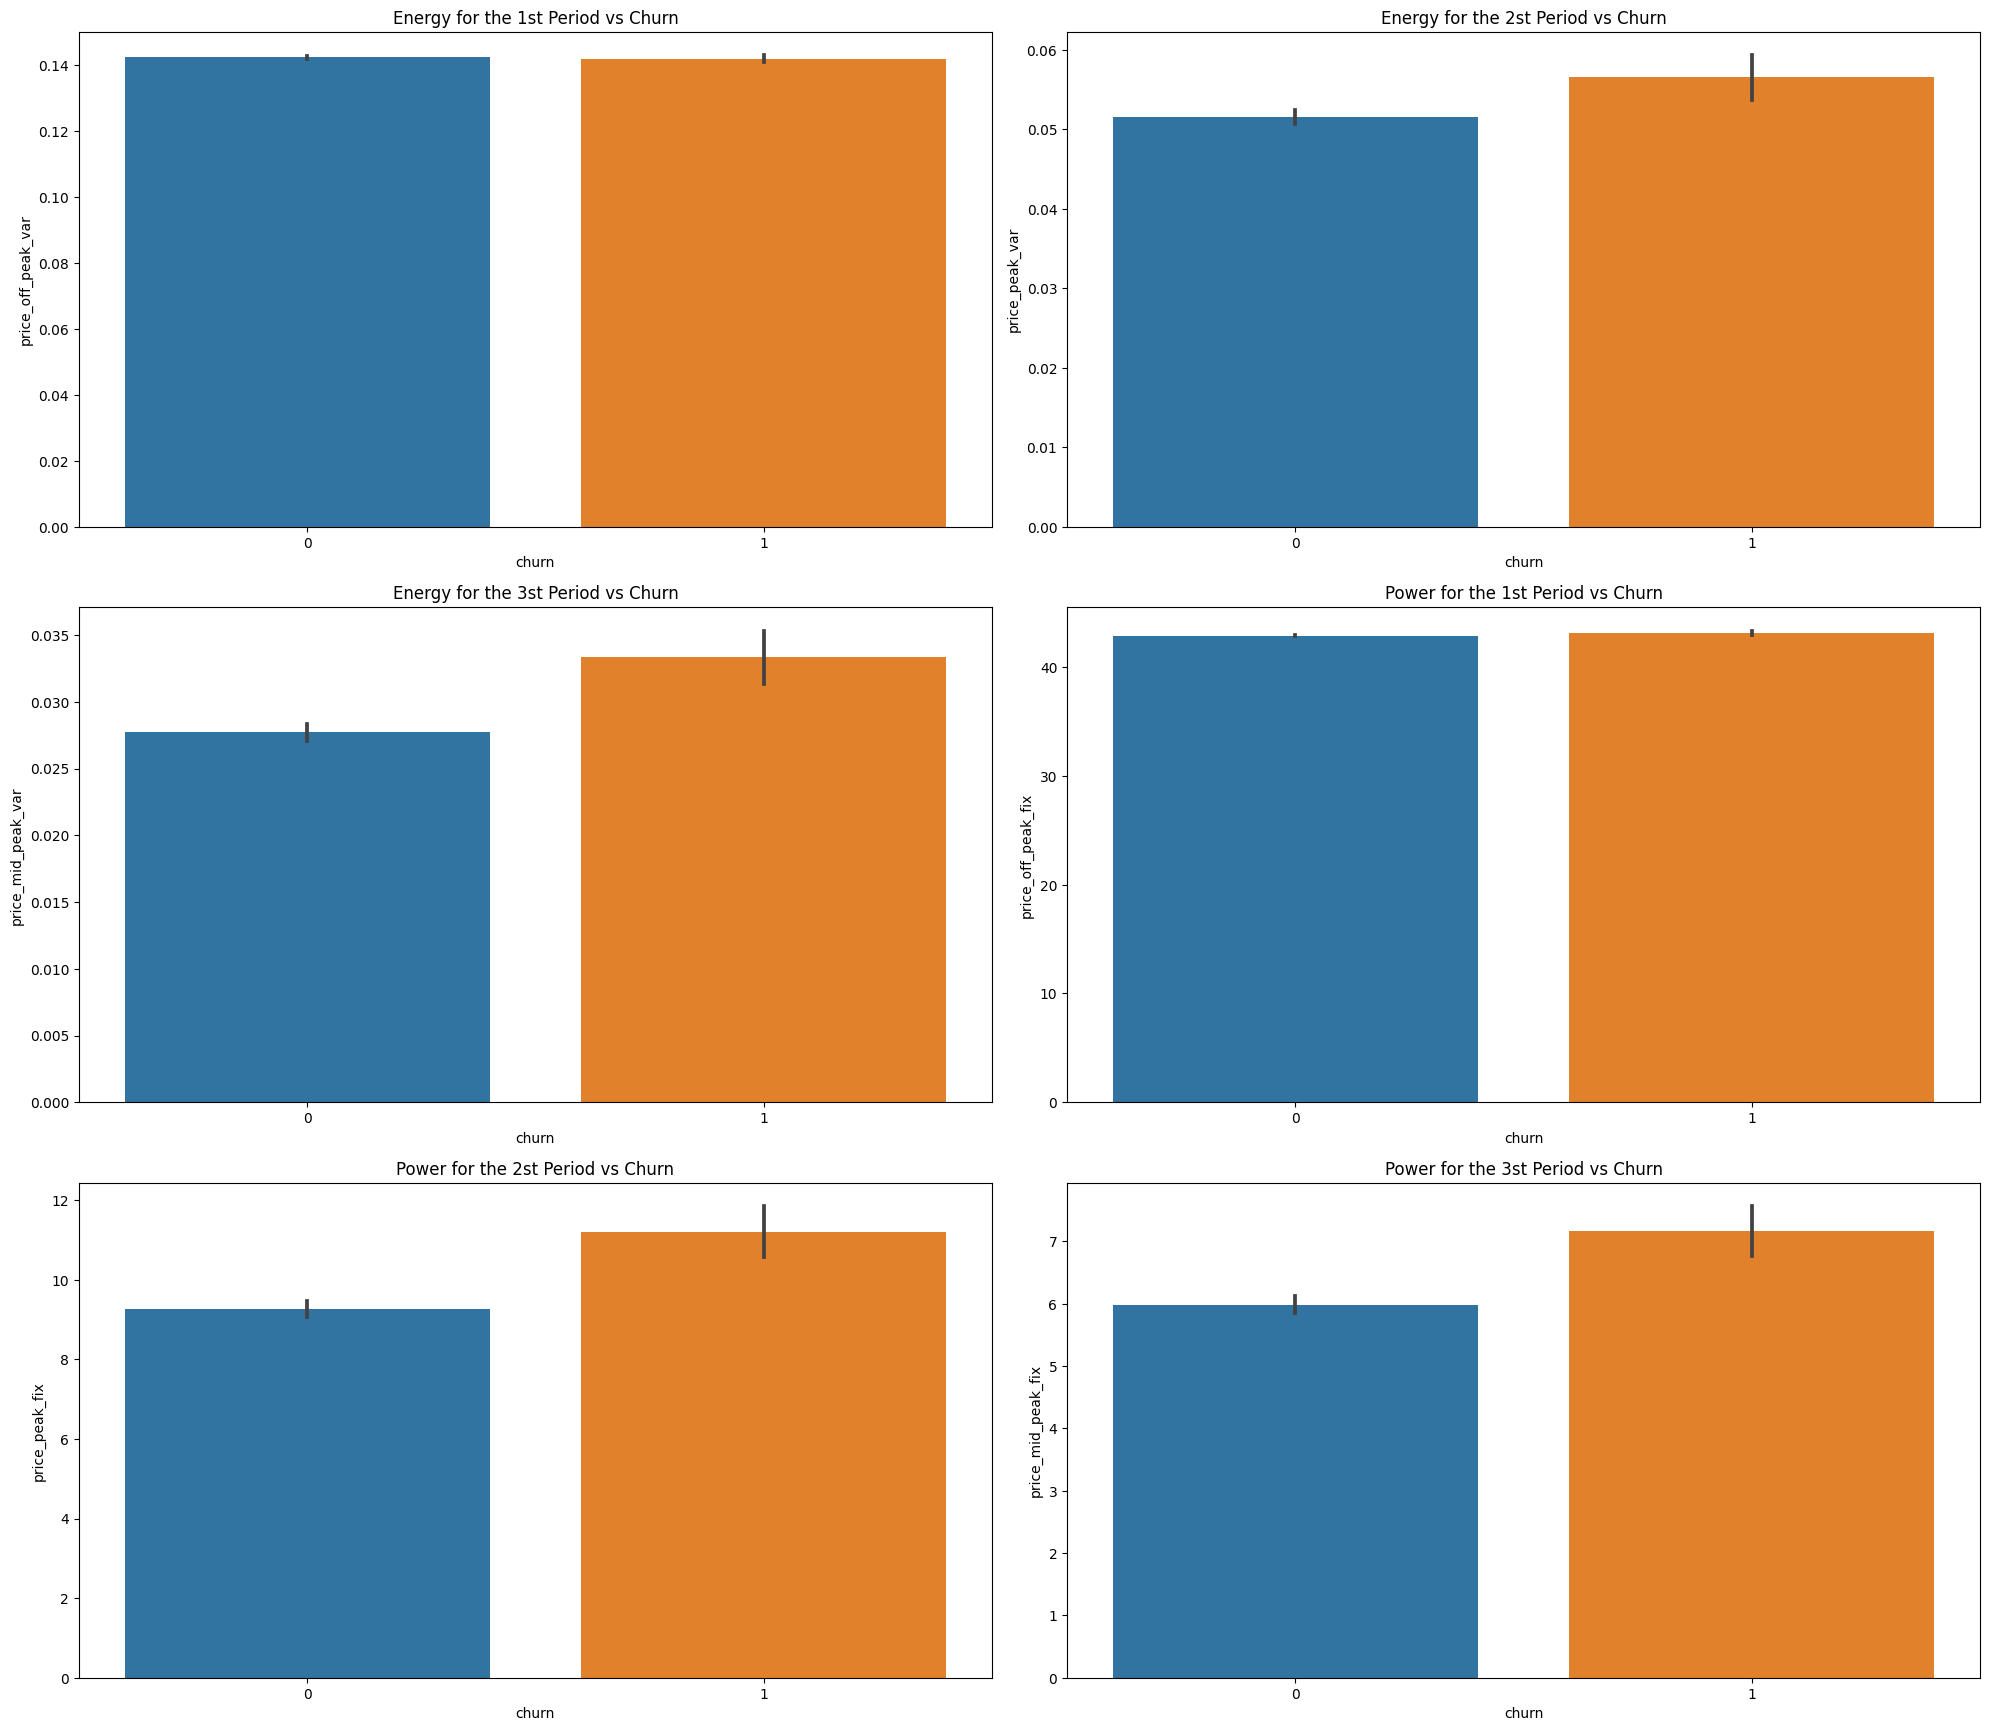

In [29]:
plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
sns.barplot(data=final_price_df,x='churn',y='price_off_peak_var')
plt.title('Energy for the 1st Period vs Churn')

plt.subplot(7,2,2)
sns.barplot(data=final_price_df,x='churn',y='price_peak_var')
plt.title('Energy for the 2st Period vs Churn')

plt.subplot(7,2,3)
sns.barplot(data=final_price_df,x='churn',y='price_mid_peak_var')
plt.title('Energy for the 3st Period vs Churn')

plt.subplot(7,2,4)
sns.barplot(data=final_price_df,x='churn',y='price_off_peak_fix')
plt.title('Power for the 1st Period vs Churn')

plt.subplot(7,2,5)
sns.barplot(data=final_price_df,x='churn',y='price_peak_fix')
plt.title('Power for the 2st Period vs Churn')

plt.subplot(7,2,6)
sns.barplot(data=final_price_df,x='churn',y='price_mid_peak_fix')
plt.title('Power for the 3st Period vs Churn')

plt.tight_layout()

# Time Series Analysis

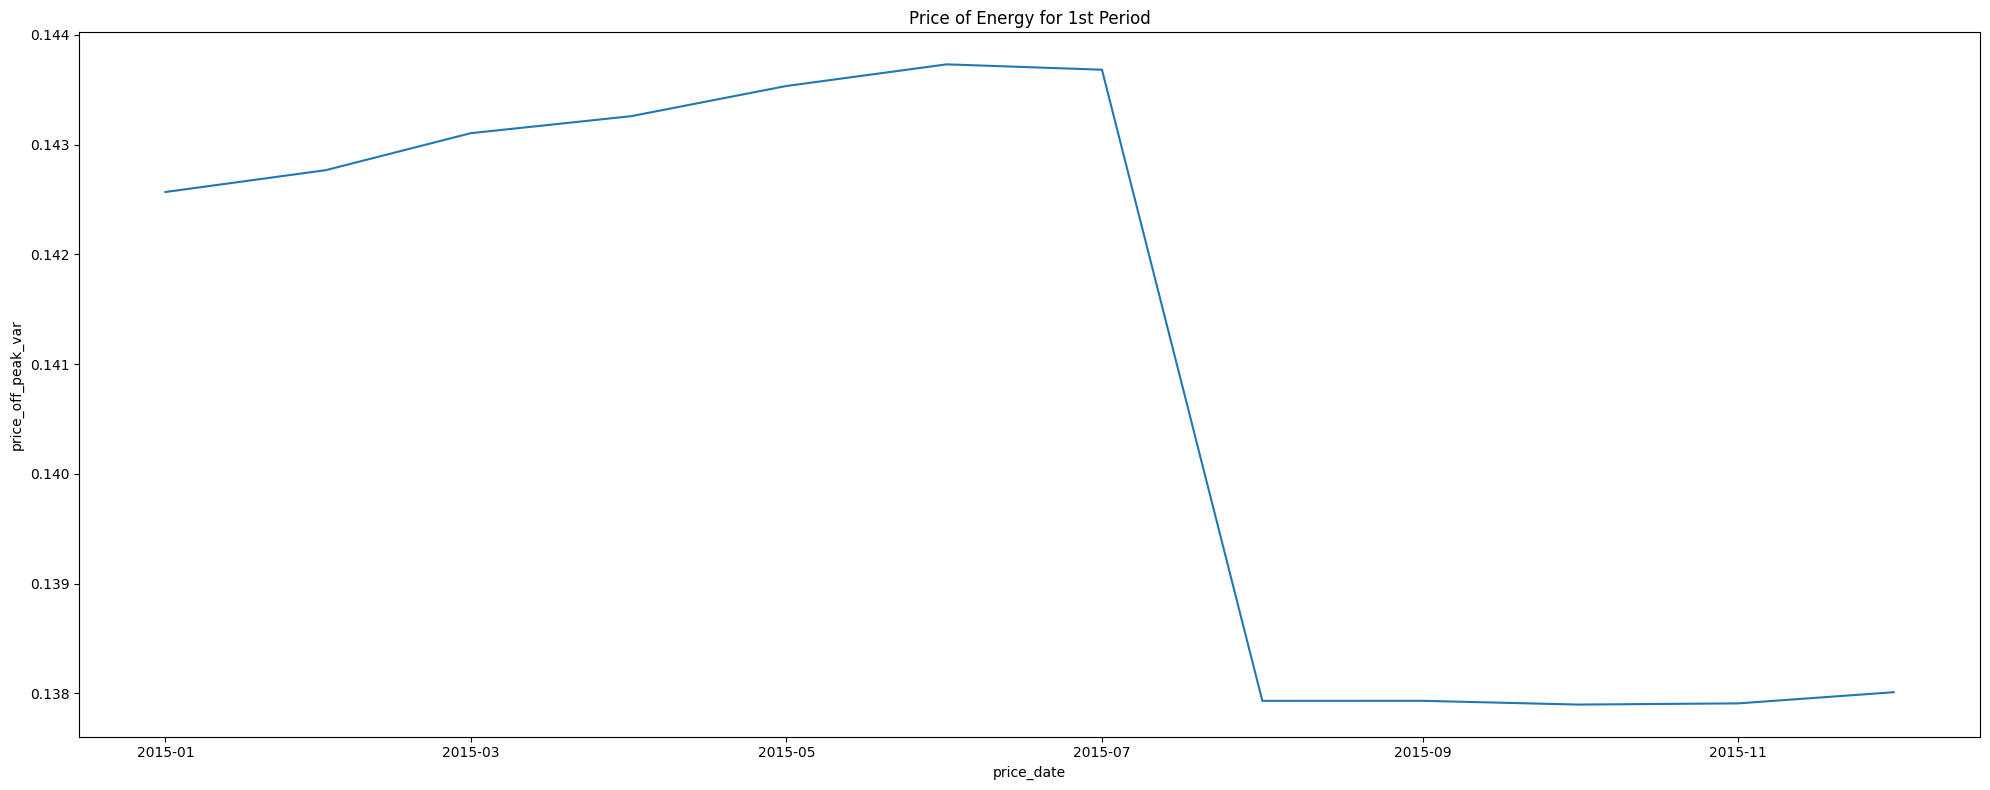

In [30]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='price_date',y='price_off_peak_var',estimator='mean',ci=None)
plt.title('Price of Energy for 1st Period')
plt.tight_layout()

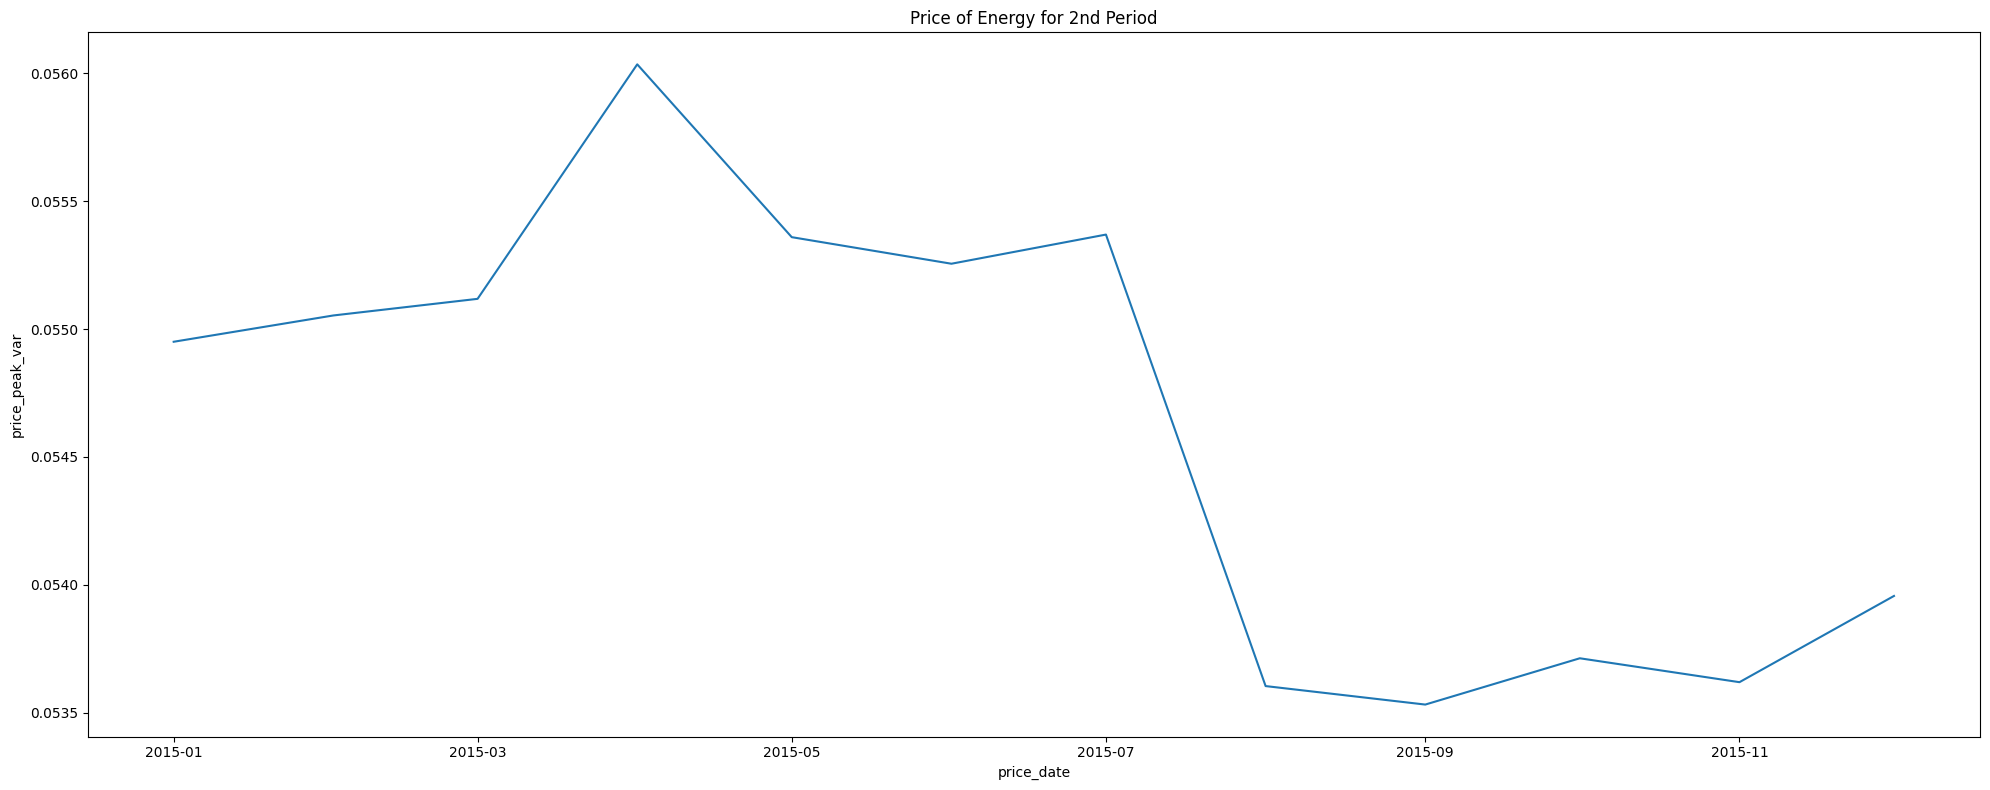

In [31]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x=df.price_date,y=df.price_peak_var,estimator='mean',ci=None)
plt.title('Price of Energy for 2nd Period')
plt.tight_layout()

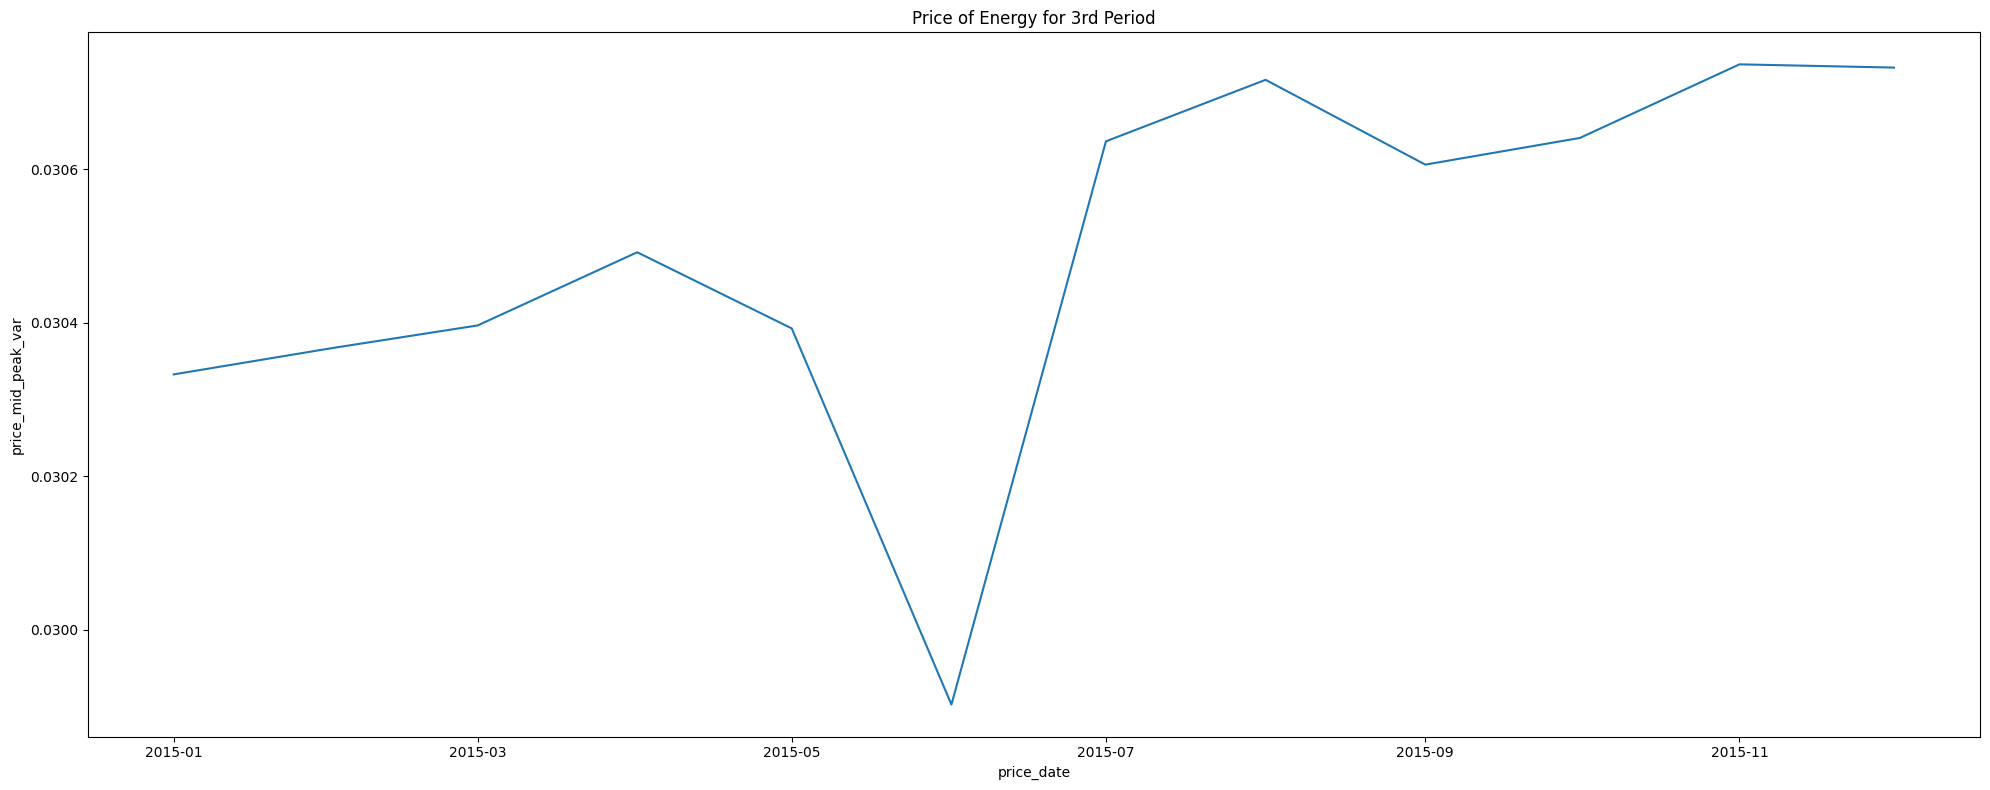

In [32]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='price_date',y='price_mid_peak_var',estimator='mean',ci=None)
plt.title('Price of Energy for 3rd Period')
plt.tight_layout()

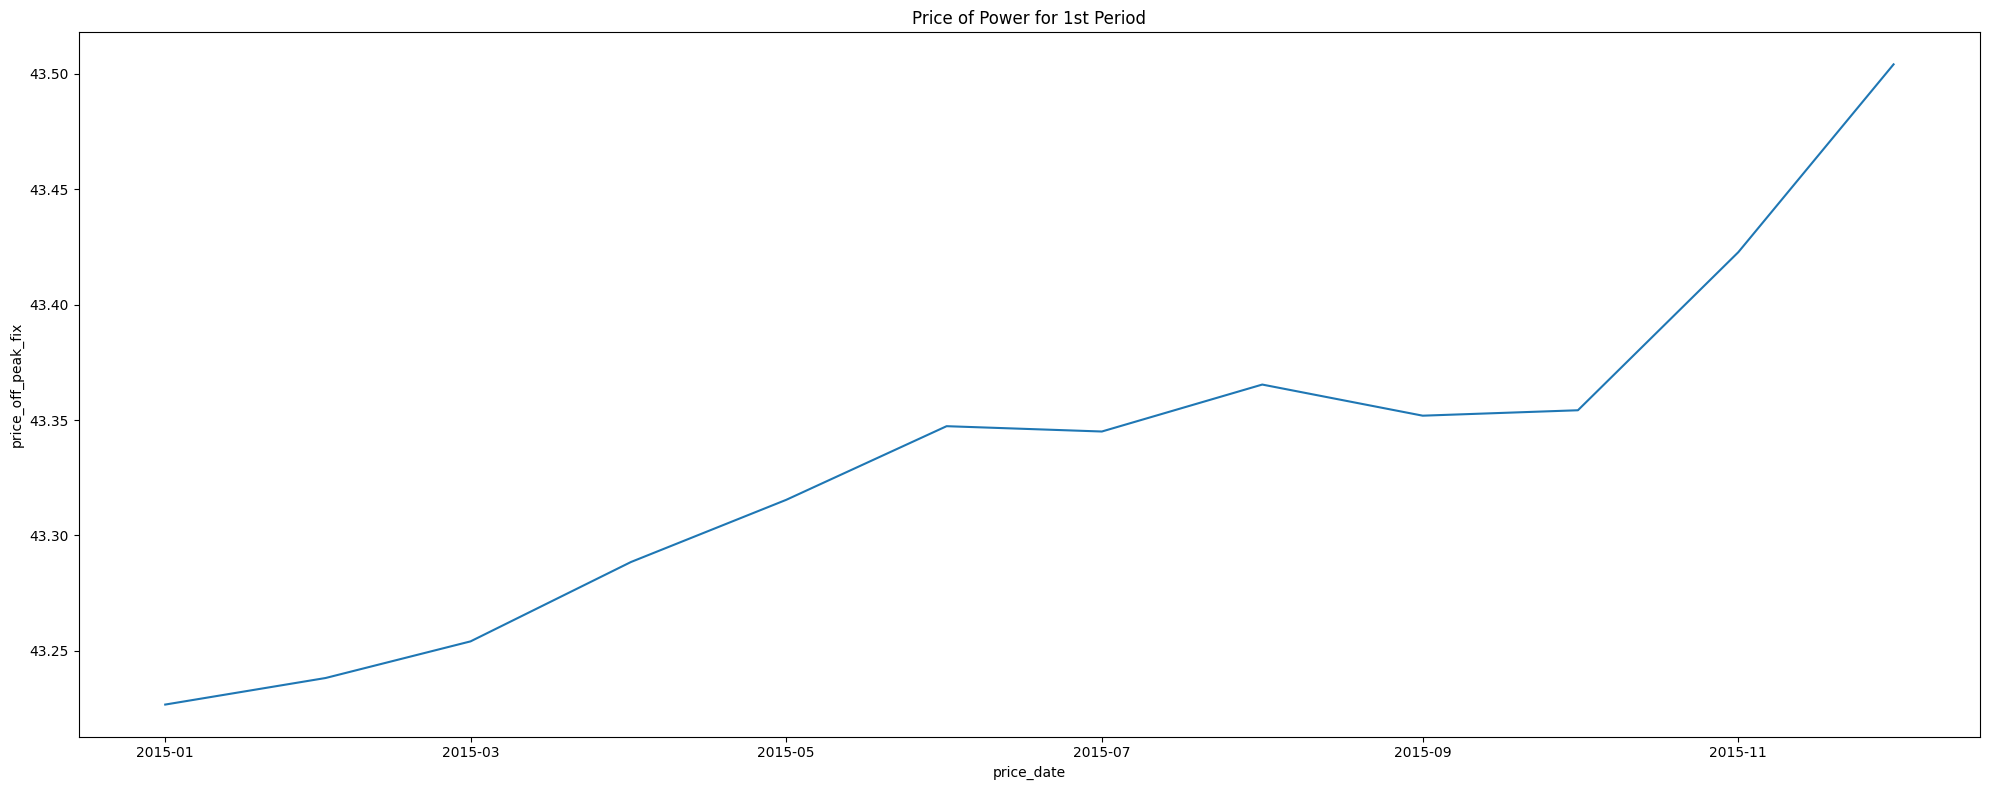

In [33]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='price_date',y='price_off_peak_fix',estimator='mean',ci=None)
plt.title('Price of Power for 1st Period')
plt.tight_layout()

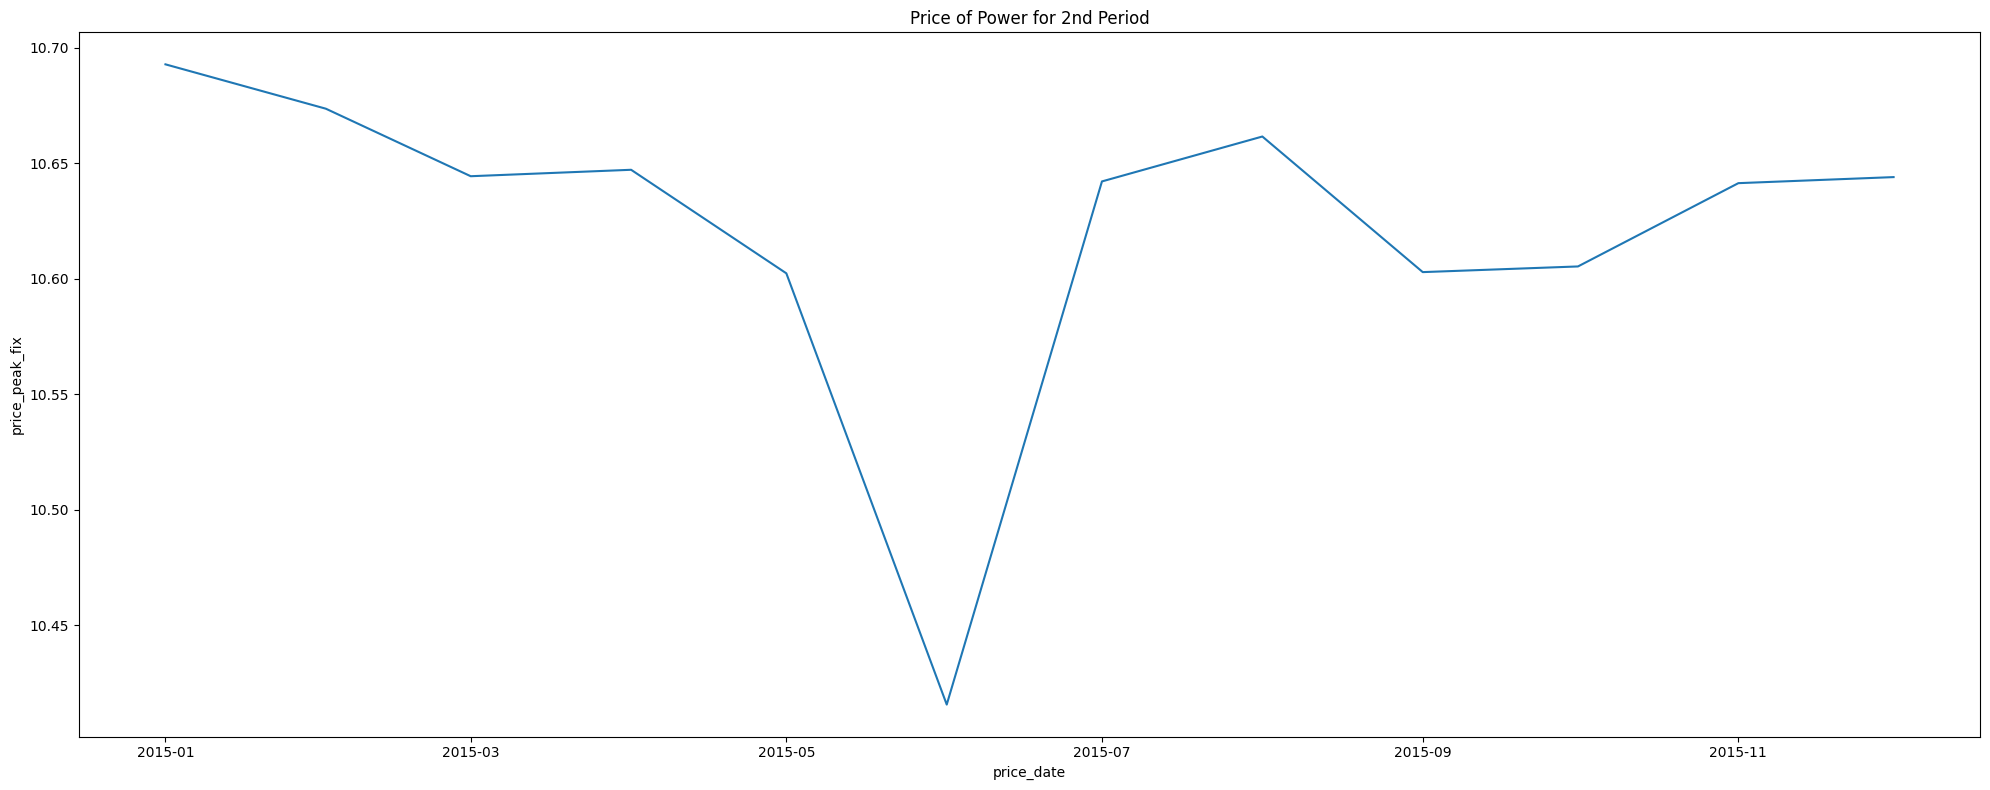

In [34]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='price_date',y='price_peak_fix',estimator='mean',ci=None)
plt.title('Price of Power for 2nd Period')
plt.tight_layout()

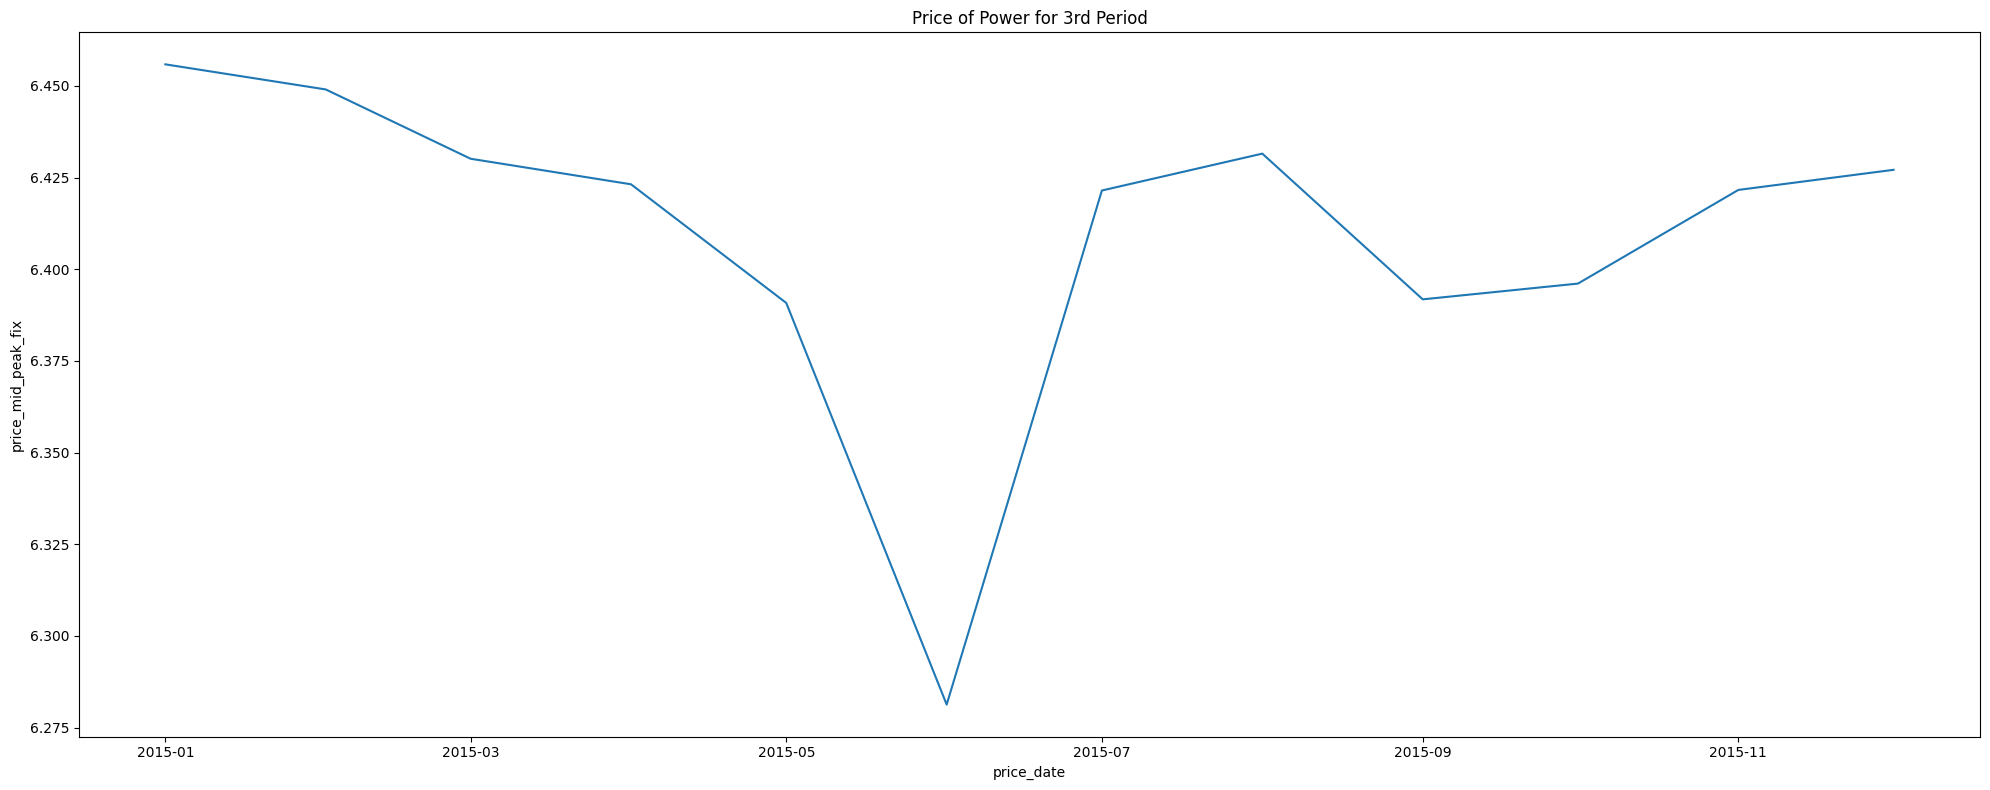

In [35]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='price_date',y='price_mid_peak_fix',estimator='mean',ci=None)
plt.title('Price of Power for 3rd Period')
plt.tight_layout()

# Correlations

In [36]:
df.corr()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
price_off_peak_var,1.000000,-0.328580,-0.594872,0.417097,-0.630018,-0.572229
price_peak_var,-0.328580,1.000000,0.821353,-0.098627,0.796097,0.807759
price_mid_peak_var,-0.594872,0.821353,1.000000,-0.137848,0.973960,0.979717
price_off_peak_fix,0.417097,-0.098627,-0.137848,1.000000,-0.000428,-0.252661
price_peak_fix,-0.630018,0.796097,0.973960,-0.000428,1.000000,0.927308
price_mid_peak_fix,-0.572229,0.807759,0.979717,-0.252661,0.927308,1.000000


<Axes: >

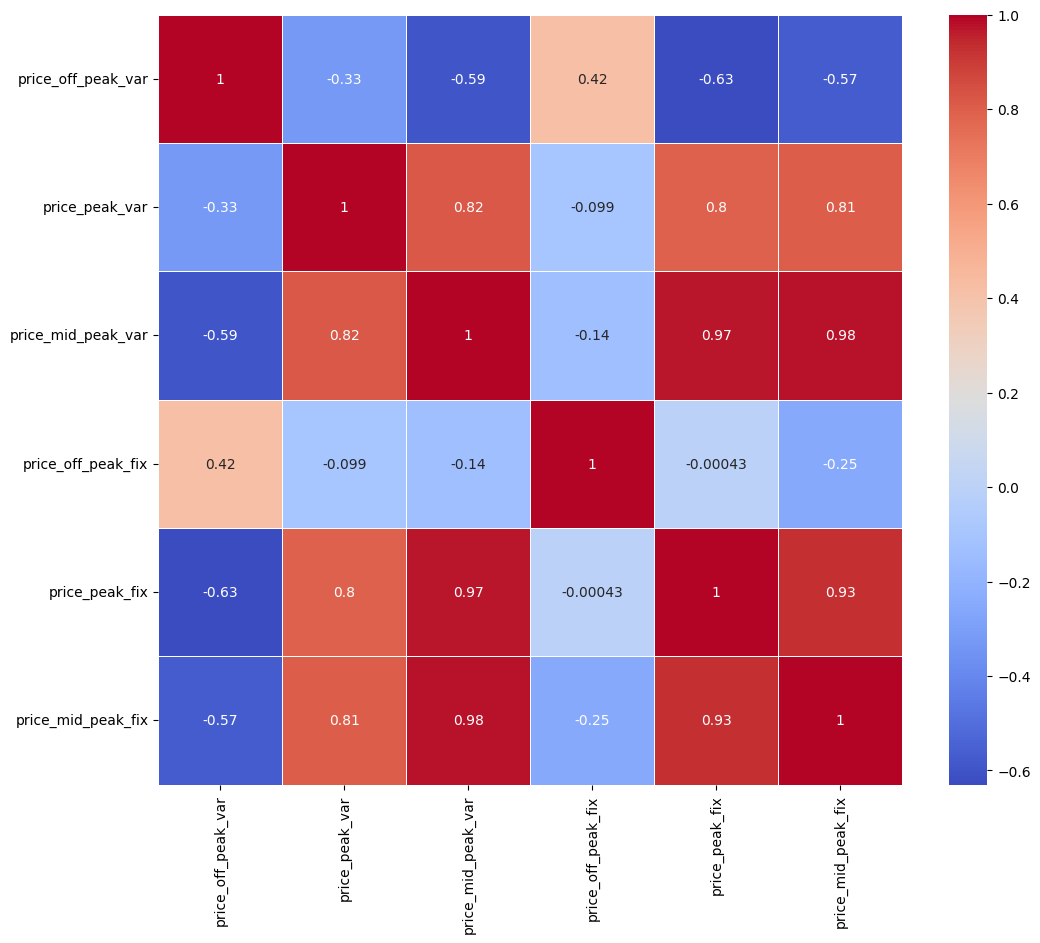

In [37]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,linewidths=0.5,linecolor='white')

Conclusion: Period 2nd and 3rd is highly correlated